# EDA

## Imports and Settings

In [19]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

import mplcatppuccin
from mplcatppuccin.colormaps import get_colormap_from_list
from mplcatppuccin.palette import load_color

from statsmodels.tsa.stattools import adfuller

import os

import sys
sys.path.append("..") # go to parent dir

from utils.currency_df import league_df, trade_ratio, average_ratio, league_day

In [2]:
# This line is for our plot color schemes down the line.
mpl.style.use("mocha")

In [3]:
cat_color = ['rosewater', 'flamingo', 'pink', 'mauve', 'red', 'maroon', 'peach',
                 'yellow', 'green', 'teal', 'sky', 'sapphire', 'blue', 'lavender']

## Intro

Through out this project we will be using the data gathered by [poe.ninja](https://poe.ninja/data) that have been added on to with our functions from the utils directory. Here is an example of the league_df function with default parameters. It returns a dataframe with all the data on the Standard League currency market. 

In [4]:
df = league_df()

df.head()

League       Date          Get        Pay     Value Confidence
0  Standard 2022-12-09  Exalted Orb  Chaos Orb  23.68423       High
1  Standard 2022-12-10  Exalted Orb  Chaos Orb  23.50797       High
2  Standard 2022-12-11  Exalted Orb  Chaos Orb  23.16688       High
3  Standard 2022-12-12  Exalted Orb  Chaos Orb  23.09729       High
4  Standard 2022-12-13  Exalted Orb  Chaos Orb  23.95626       High

In [5]:
df = trade_ratio(df)

df.head()

League       Date          Get        Pay     Value Confidence     Ratio
0  Standard 2022-12-09  Exalted Orb  Chaos Orb  23.68423       High  23.68423
1  Standard 2022-12-10  Exalted Orb  Chaos Orb  23.50797       High  23.50797
2  Standard 2022-12-11  Exalted Orb  Chaos Orb  23.16688       High  23.16688
3  Standard 2022-12-12  Exalted Orb  Chaos Orb  23.09729       High  23.09729
4  Standard 2022-12-13  Exalted Orb  Chaos Orb  23.95626       High  23.95626

In [6]:
df = league_day(df)

df.head()

League       Date          Get        Pay     Value Confidence     Ratio  \
0  Standard 2022-12-09  Exalted Orb  Chaos Orb  23.68423       High  23.68423   
1  Standard 2022-12-10  Exalted Orb  Chaos Orb  23.50797       High  23.50797   
2  Standard 2022-12-11  Exalted Orb  Chaos Orb  23.16688       High  23.16688   
3  Standard 2022-12-12  Exalted Orb  Chaos Orb  23.09729       High  23.09729   
4  Standard 2022-12-13  Exalted Orb  Chaos Orb  23.95626       High  23.95626   

    Day  
0  2210  
1  2211  
2  2212  
3  2213  
4  2214

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466927 entries, 0 to 466926
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   League      466927 non-null  object        
 1   Date        466927 non-null  datetime64[ns]
 2   Get         466927 non-null  object        
 3   Pay         466927 non-null  object        
 4   Value       466927 non-null  float64       
 5   Confidence  466927 non-null  object        
 6   Ratio       466927 non-null  float64       
 7   Day         466927 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.5+ MB


Here we have an example graphing proccess that will be repeated through out this notebook. 

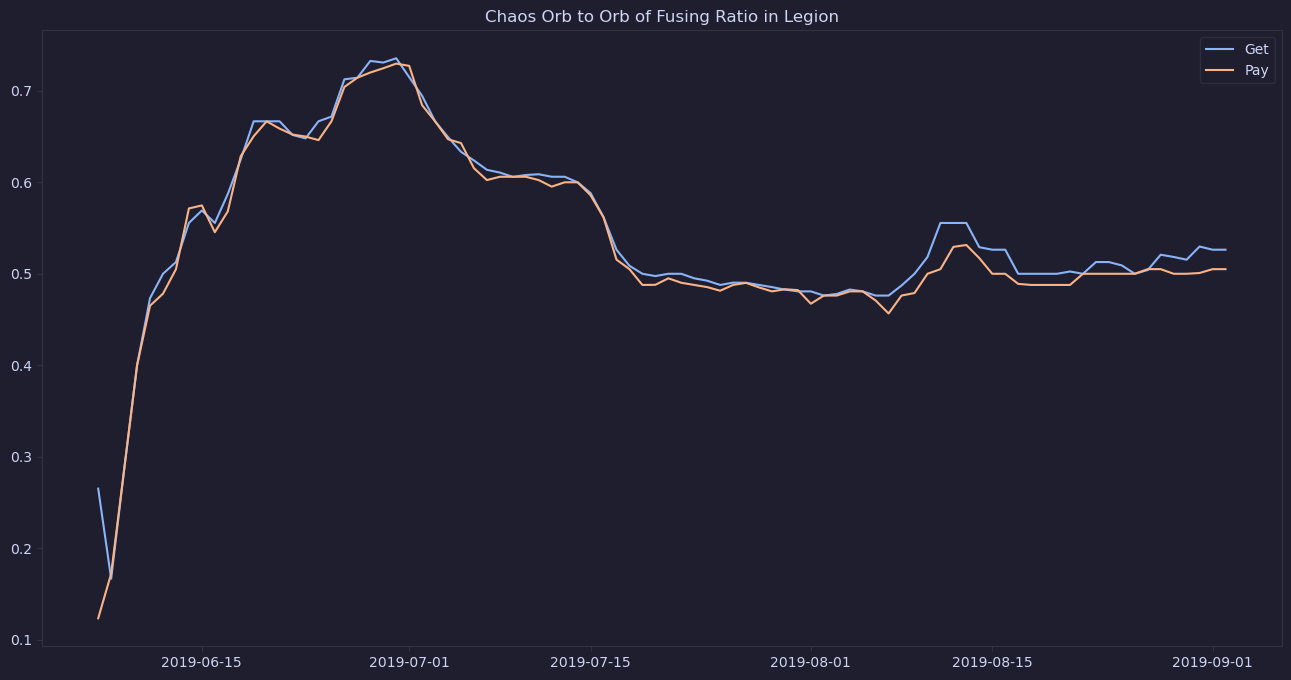

In [36]:
league = 'Legion'
currency = 'Orb of Fusing'
df = league_df(league, currency)
df = trade_ratio(df)
df = league_day(df)

plt.figure(figsize=(16,8))
plt.plot(
    df[df['Get'] == currency]['Date'],
    df[df['Get'] == currency]['Ratio'],
    label = 'Get'
)
plt.plot(
    df[df['Pay'] == currency]['Date'],
    df[df['Pay'] == currency]['Ratio'],
    label = 'Pay'
)

plt.title(f'Chaos Orb to {currency} Ratio in {league}')
plt.legend()
plt.show;

## Challenge Leagues

In [9]:
currencies = ["Hunter's Exalted Orb", "Crusader's Exalted Orb", "Redeemer's Exalted Orb", "Warlord's Exalted Orb", "Awakener's Orb"]

### Trade Ratios Over Time

In [10]:
def league_start_graph(currency):
    path = '../leagues/'
    plt.figure(figsize=(16,8))
    
    for league in os.listdir(path):
        color = load_color("mocha", random.choice(cat_color))
        df = league_df(league, currency)
        if df.empty:
            continue
        df = trade_ratio(df)
        df = average_ratio(df)
        df = league_day(df)

        plt.plot(
            df['Day'],
            df['Ratio'],
            label = league,
            color = color
        )
   
    plt.title(f'Chaos Orb to {currency} Ratio in all leagues')
    plt.legend()
    plt.savefig(f'../images/{currency}_all_leagues.png')
    plt.show;

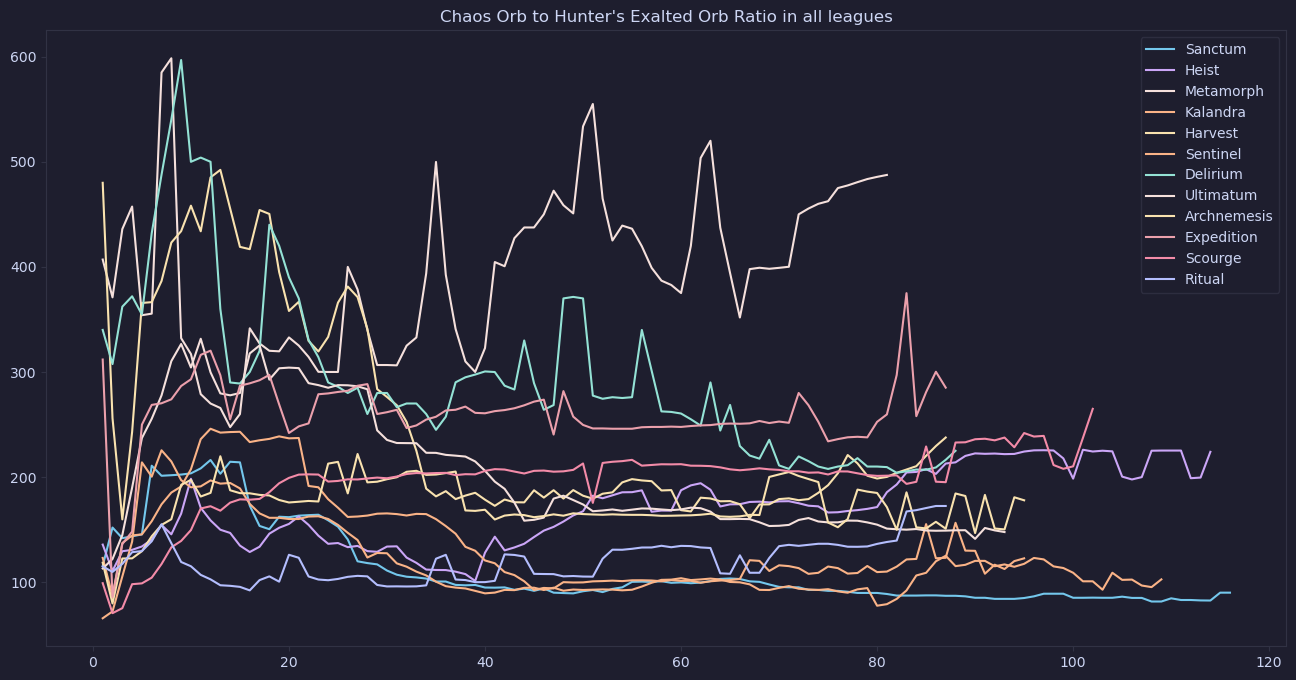

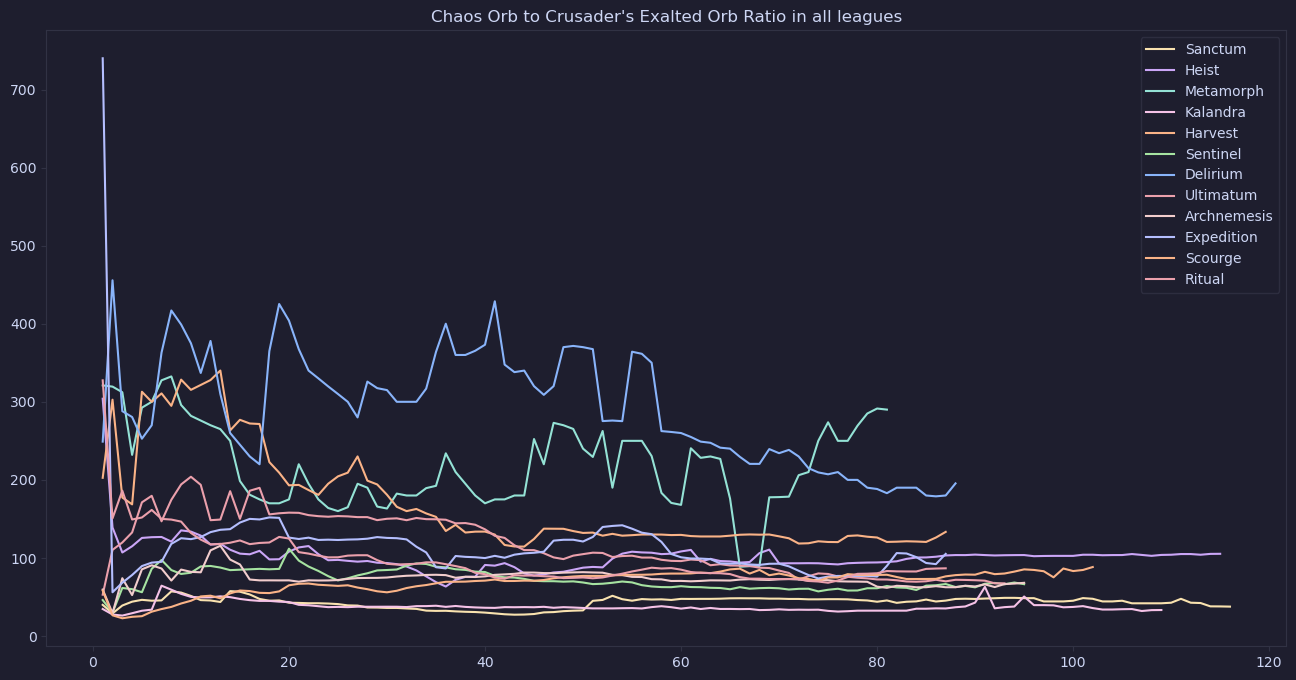

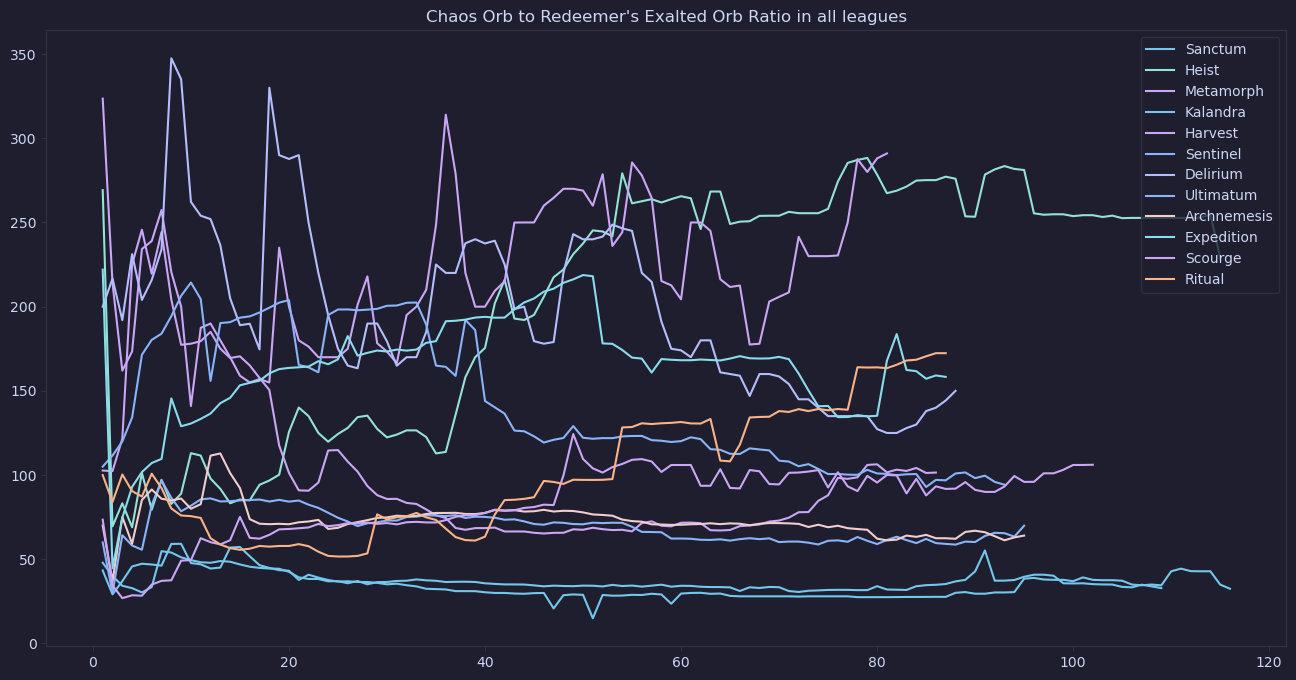

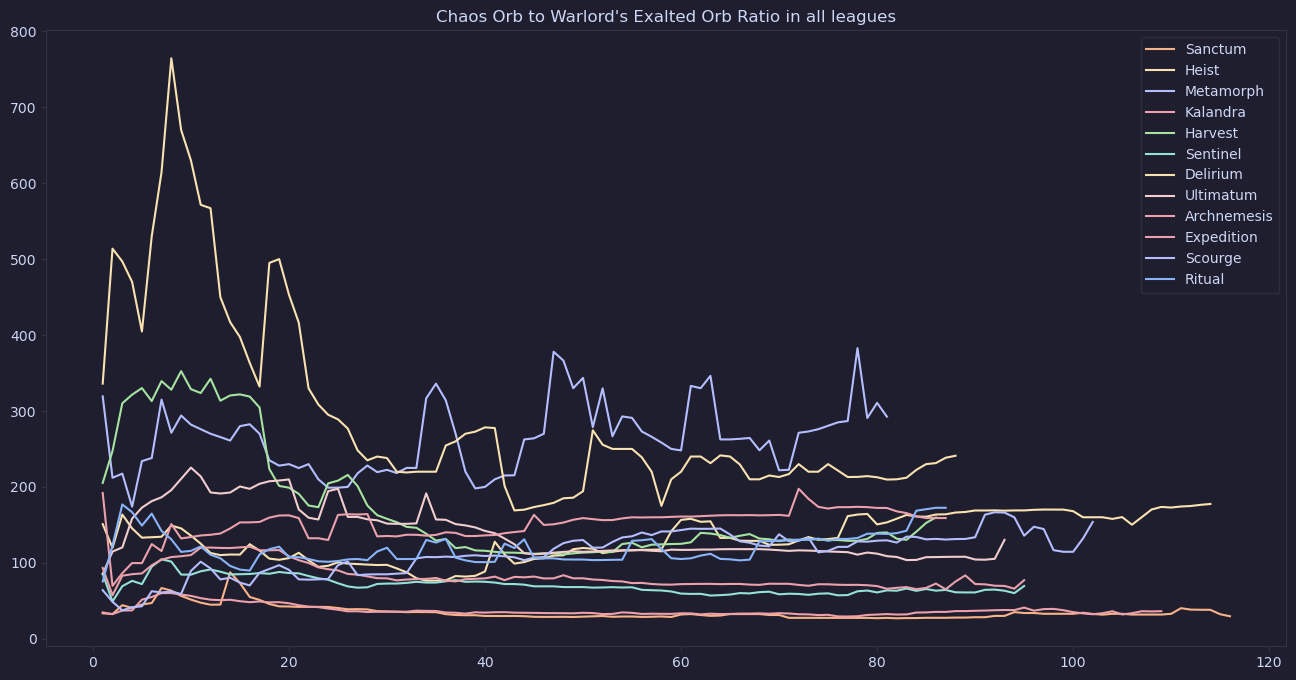

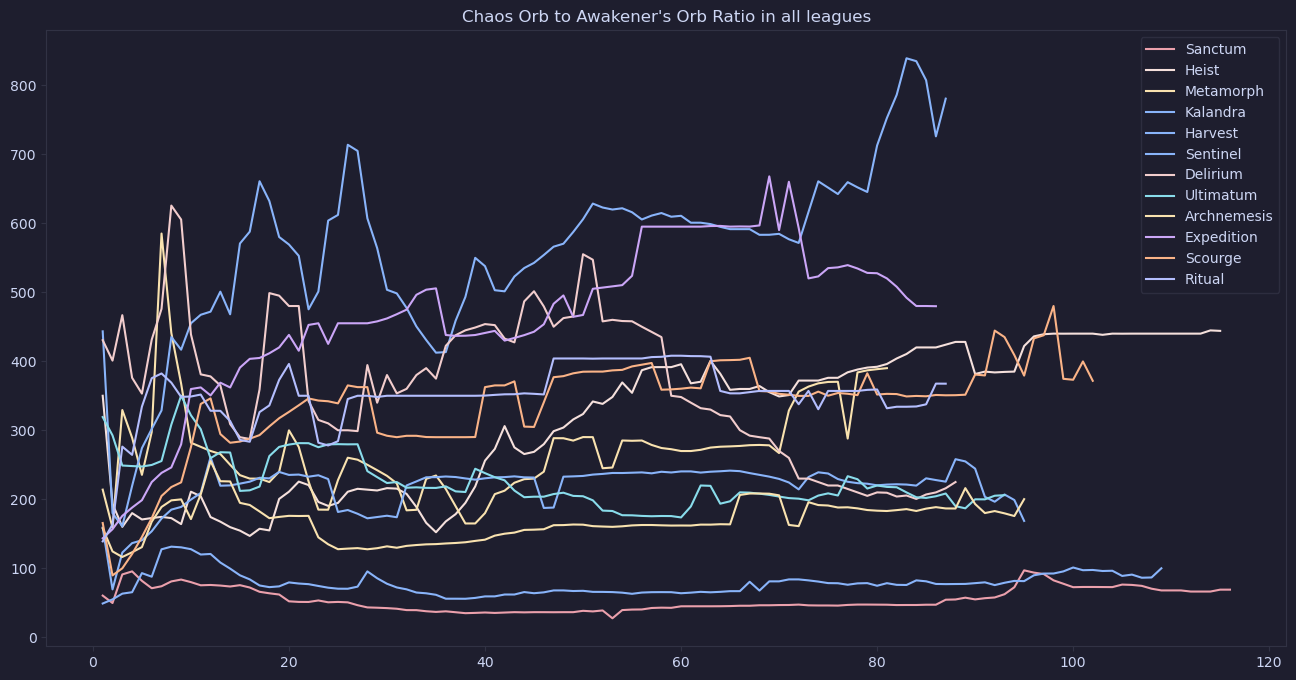

In [11]:
for currency in currencies:
    league_start_graph(currency)

### Trade Ratio Moving Average Over Time

In [12]:
def league_start_graph_moving(currency):
    path = '../leagues/'
    plt.figure(figsize=(16,8))
    
    for league in os.listdir(path):
        color = load_color("mocha", random.choice(cat_color))
        df = league_df(league, currency)
        if df.empty:
            continue
        df = trade_ratio(df)
        df = average_ratio(df)
        df = league_day(df)

        plt.plot(
            df['Day'],
            df['Ratio'].rolling(window=4).mean(numeric_only=True),
            label = league,
            color = color
        )
   
    plt.title(f'Chaos Orb to {currency} Moving Average Ratio in all leagues')
    plt.legend()
    plt.savefig(f'../images/{currency}_moving_all_leagues.png')
    plt.show;

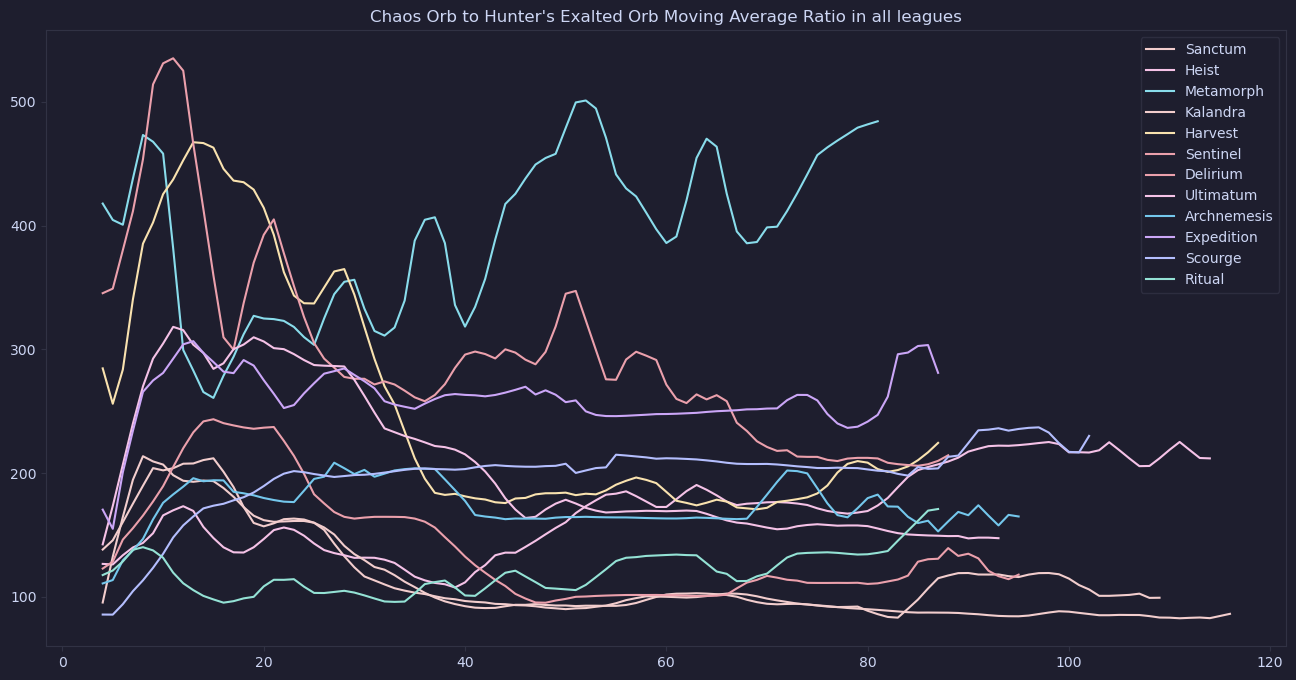

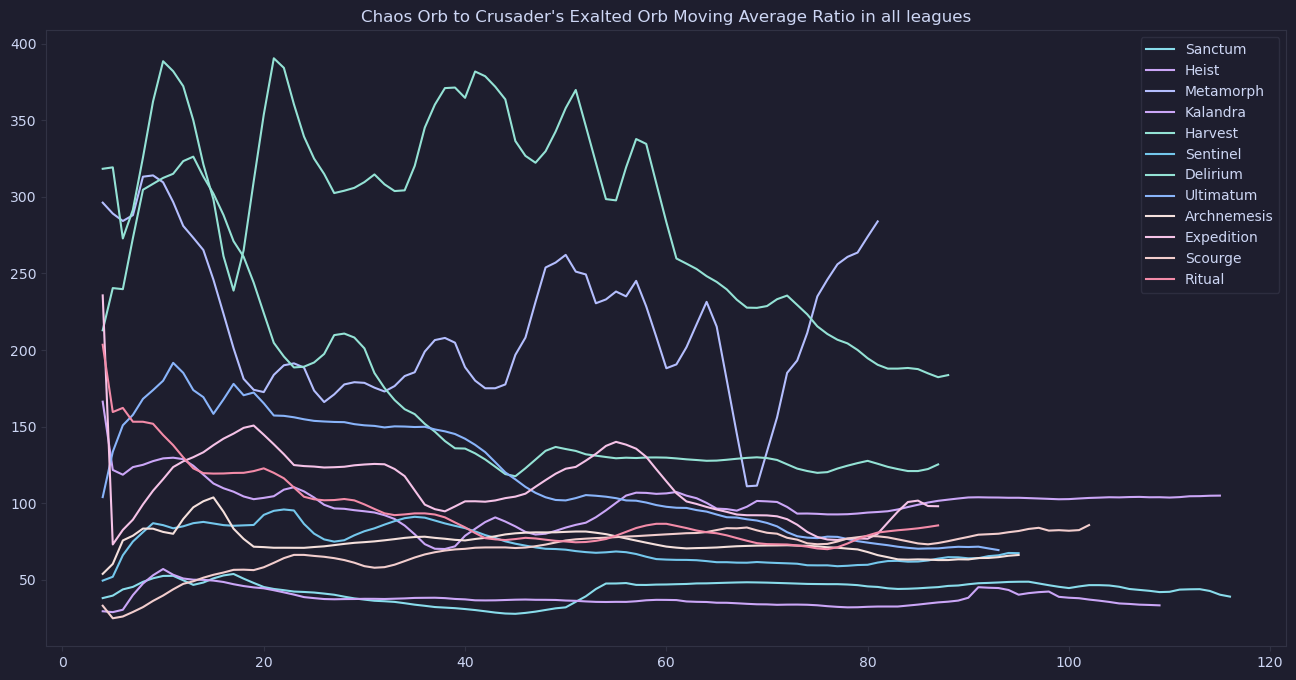

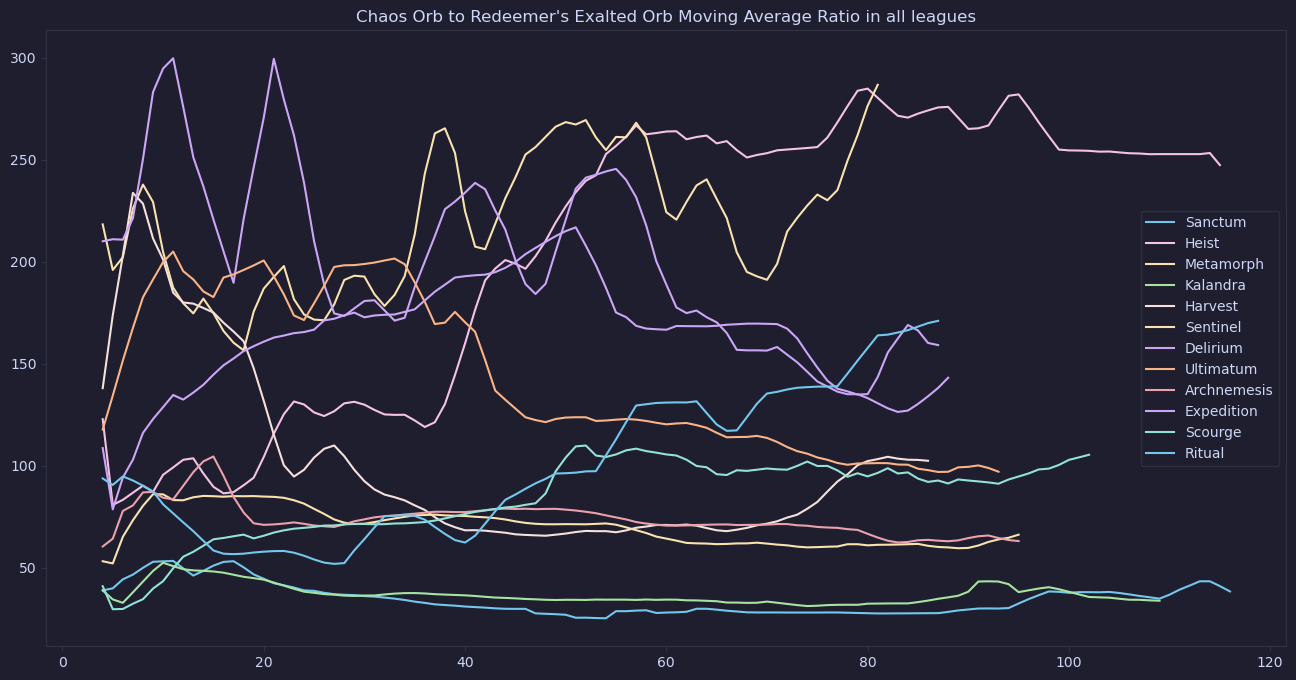

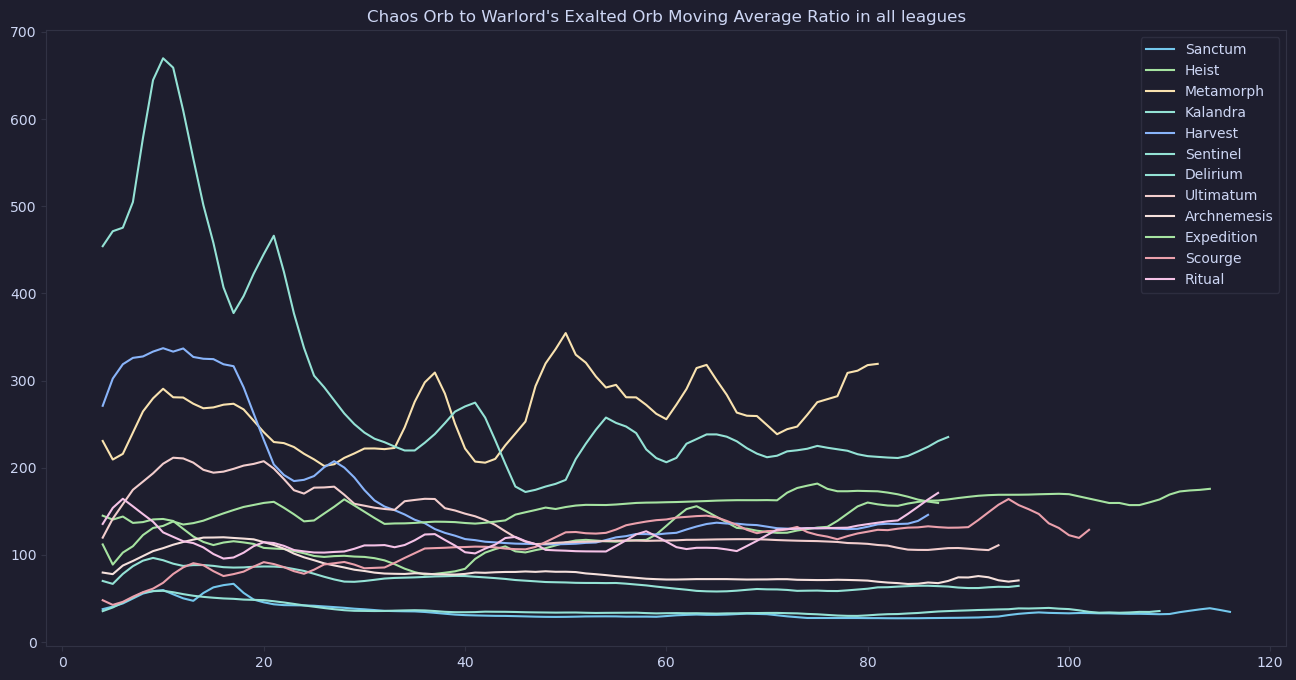

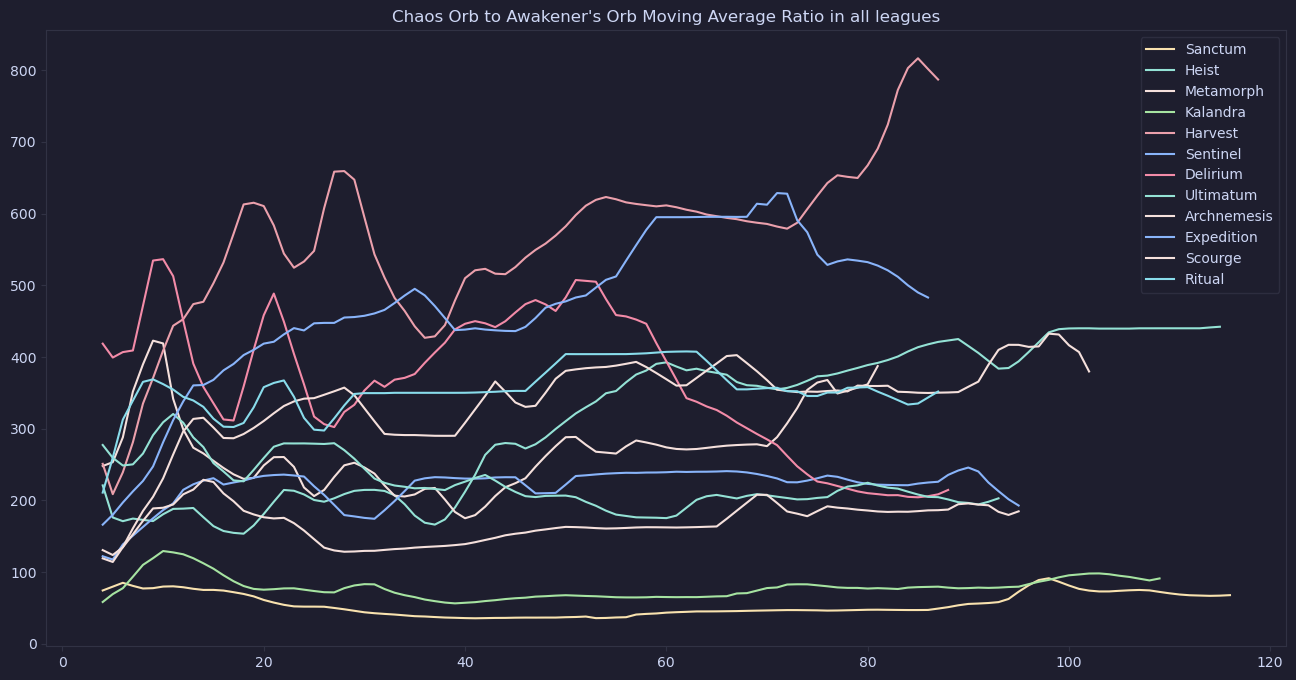

In [13]:
for currency in currencies:
    league_start_graph_moving(currency)

### Trade Ratio Differencing Over Time

In [14]:
def league_start_graph_diff(currency):
    path = '../leagues/'
    plt.figure(figsize=(16,8))
    
    for league in os.listdir(path):
        color = load_color("mocha", random.choice(cat_color))
        df = league_df(league, currency)
        if df.empty:
            continue
        df = trade_ratio(df)
        df = average_ratio(df)
        df = league_day(df)

        plt.plot(
            df['Day'],
            df['Ratio'].diff(),
            label = league,
            color = color
        )
   
    plt.title(f'Chaos Orb to {currency} Differencing Ratio in all leagues')
    plt.legend()
    plt.savefig(f'../images/{currency}_diff_all_leagues.png')
    plt.show;

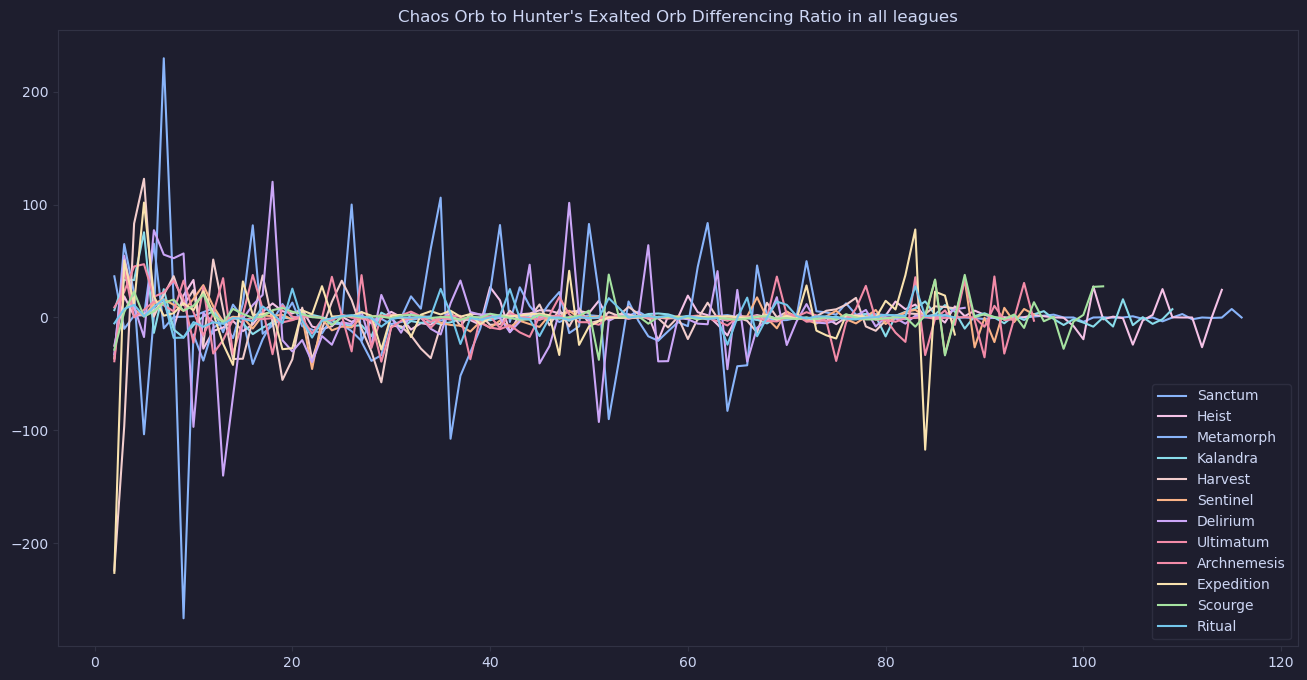

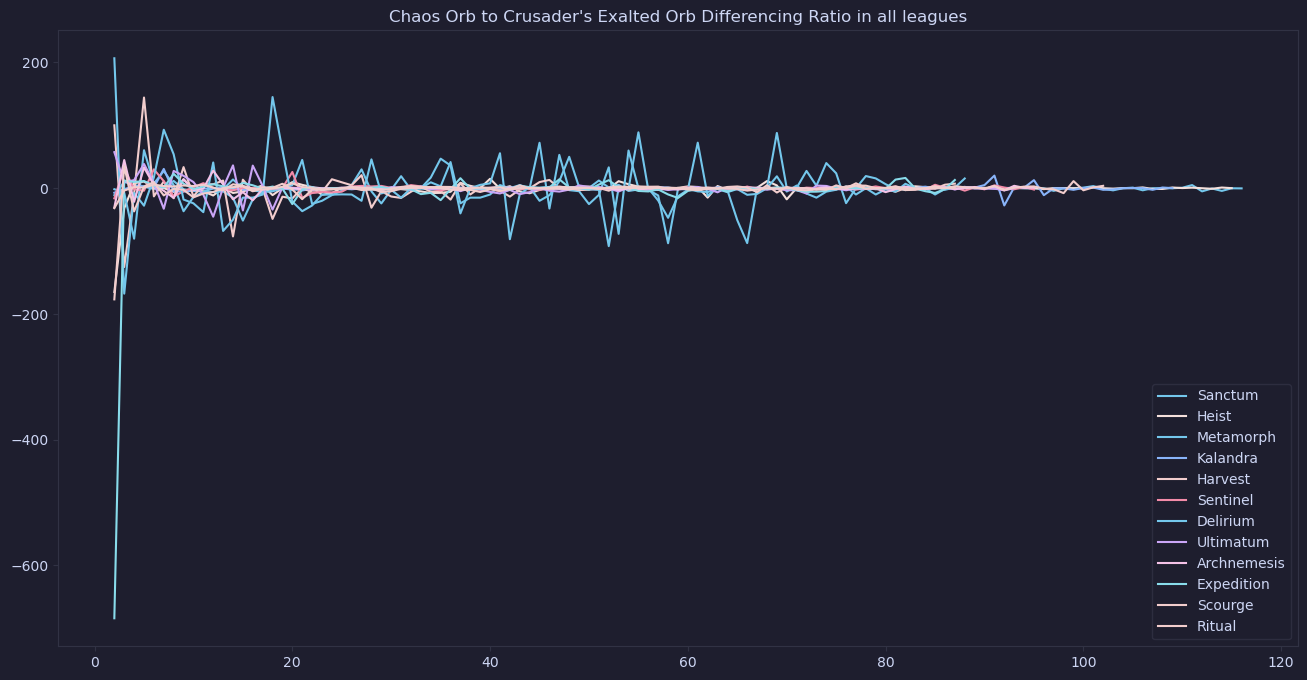

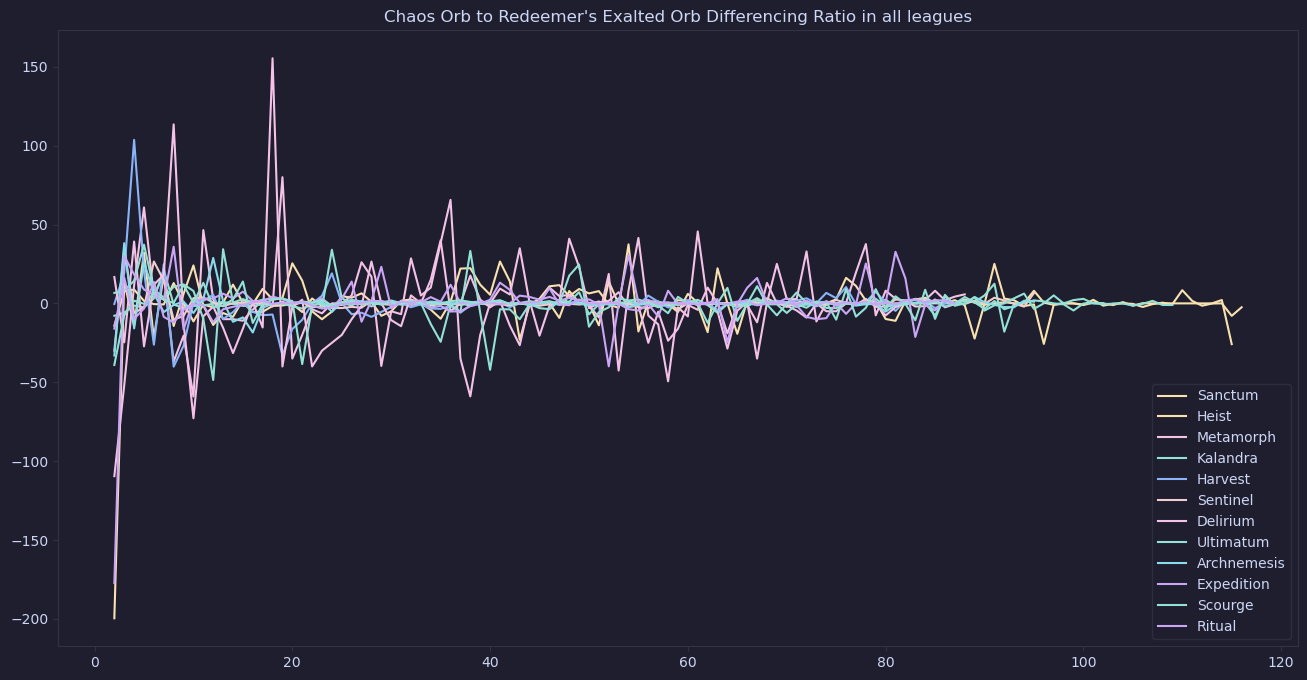

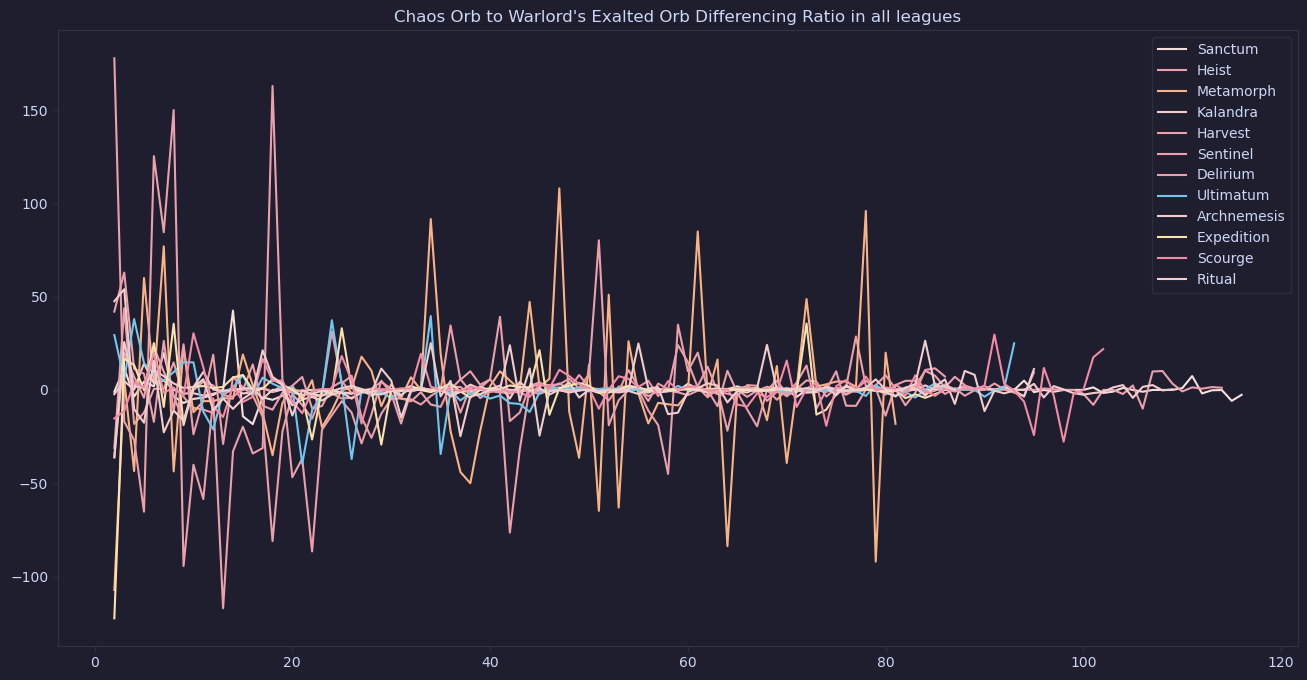

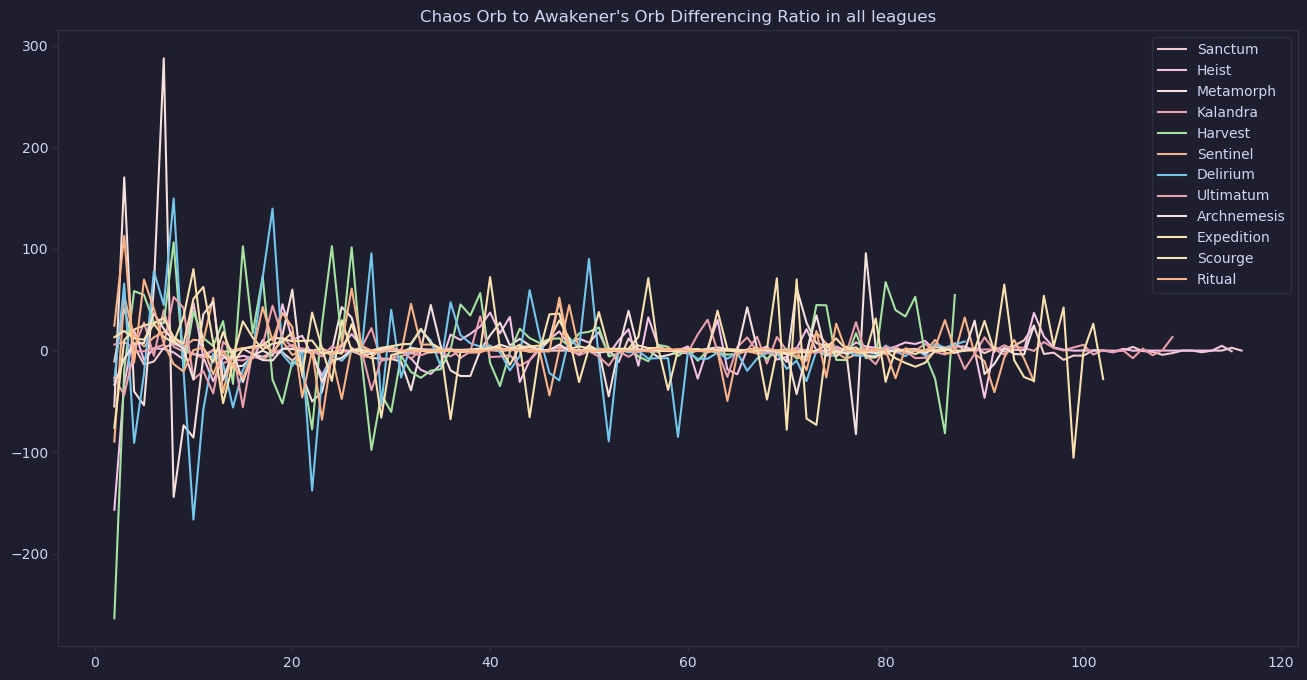

In [15]:
for currency in currencies:
    league_start_graph_diff(currency)

In [38]:
def league_start_graph_diff2(currency):
    path = '../leagues/'
    plt.figure(figsize=(16,8))
    
    for league in os.listdir(path):
        color = load_color("mocha", random.choice(cat_color))
        df = league_df(league, currency)
        if df.empty:
            continue
        df = trade_ratio(df)
        df = average_ratio(df)
        df = league_day(df)

        plt.plot(
            df['Day'],
            df['Ratio'].diff().diff(),
            label = league,
            color = color
        )
   
    plt.title(f'Chaos Orb to {currency} Double Differencing Ratio in all leagues')
    plt.legend()
    plt.savefig(f'../images/{currency}_diff_diff_all_leagues.png')
    plt.show;

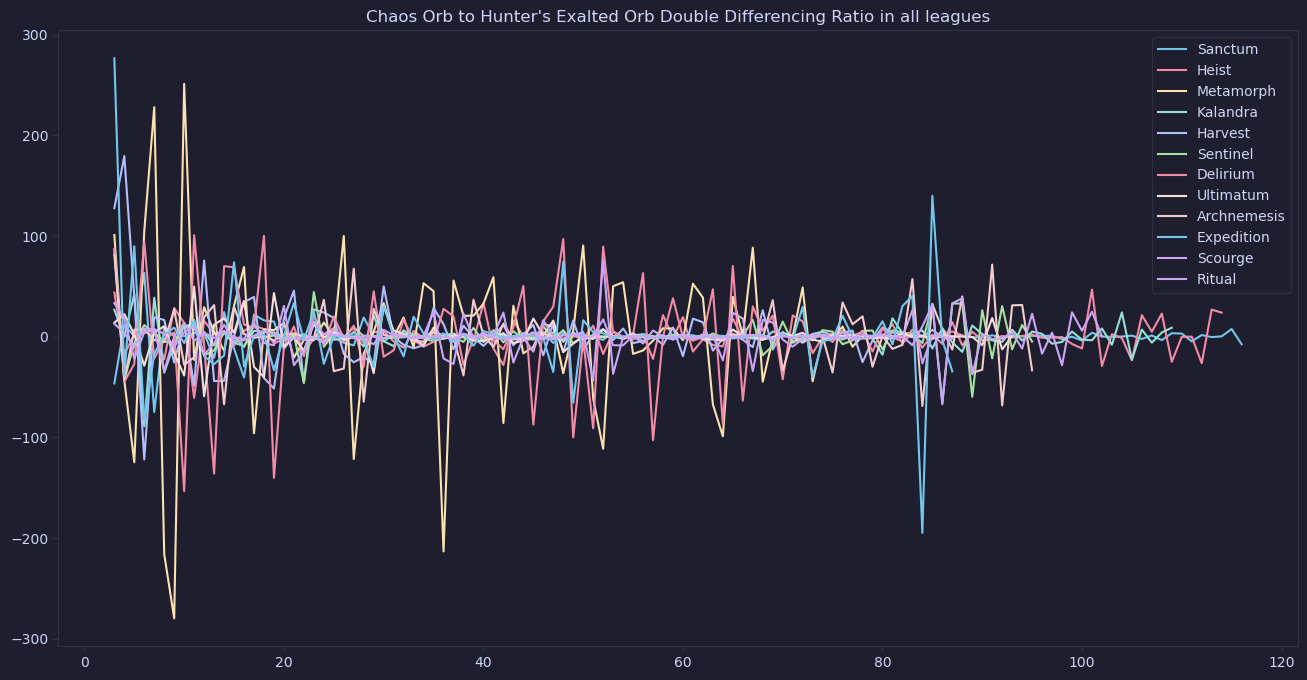

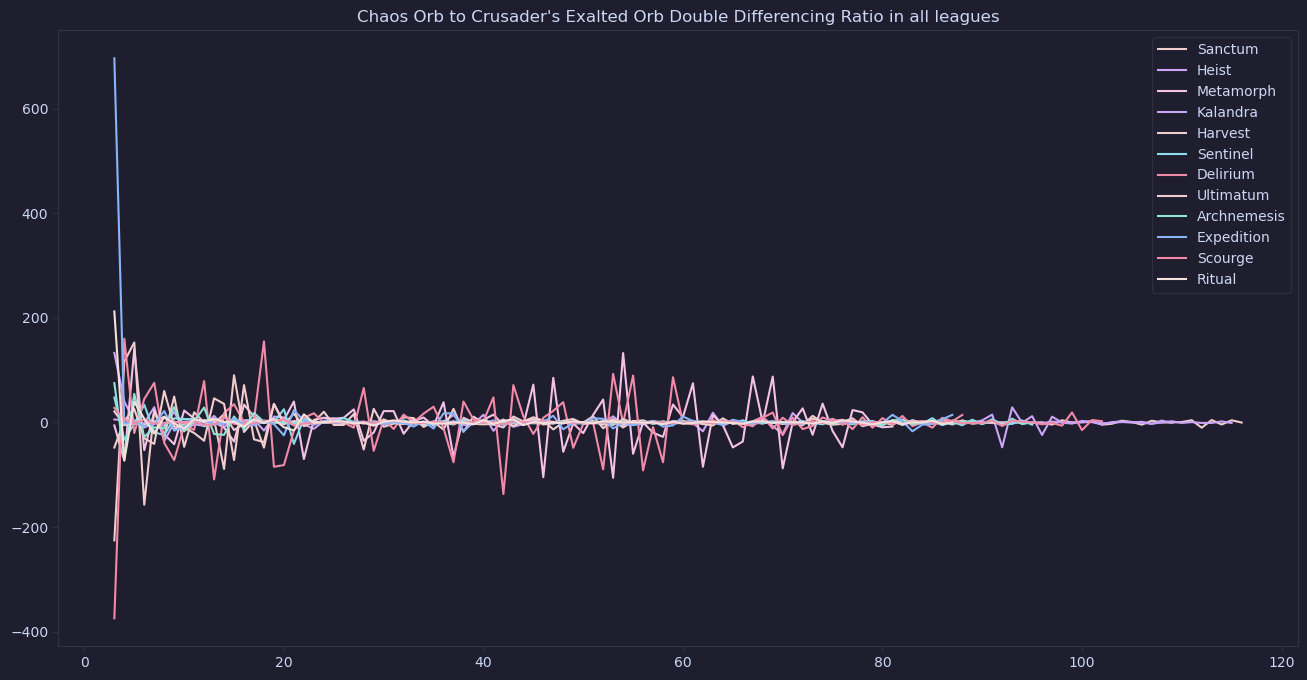

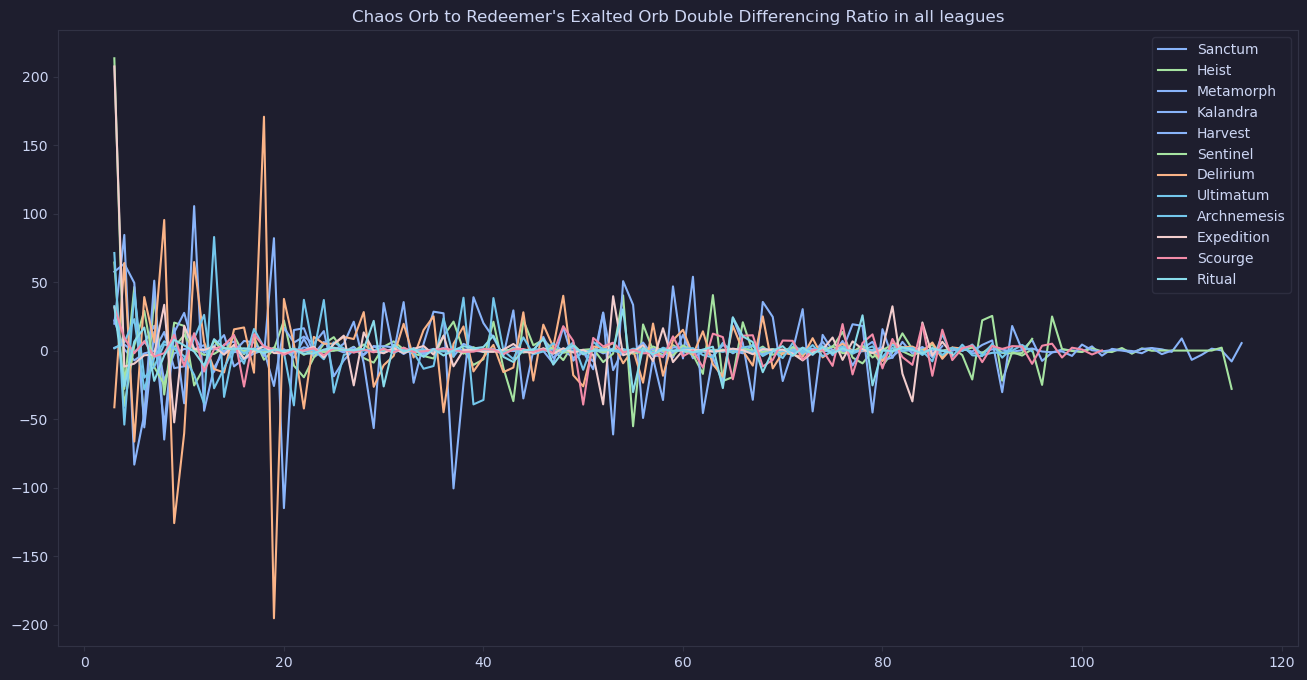

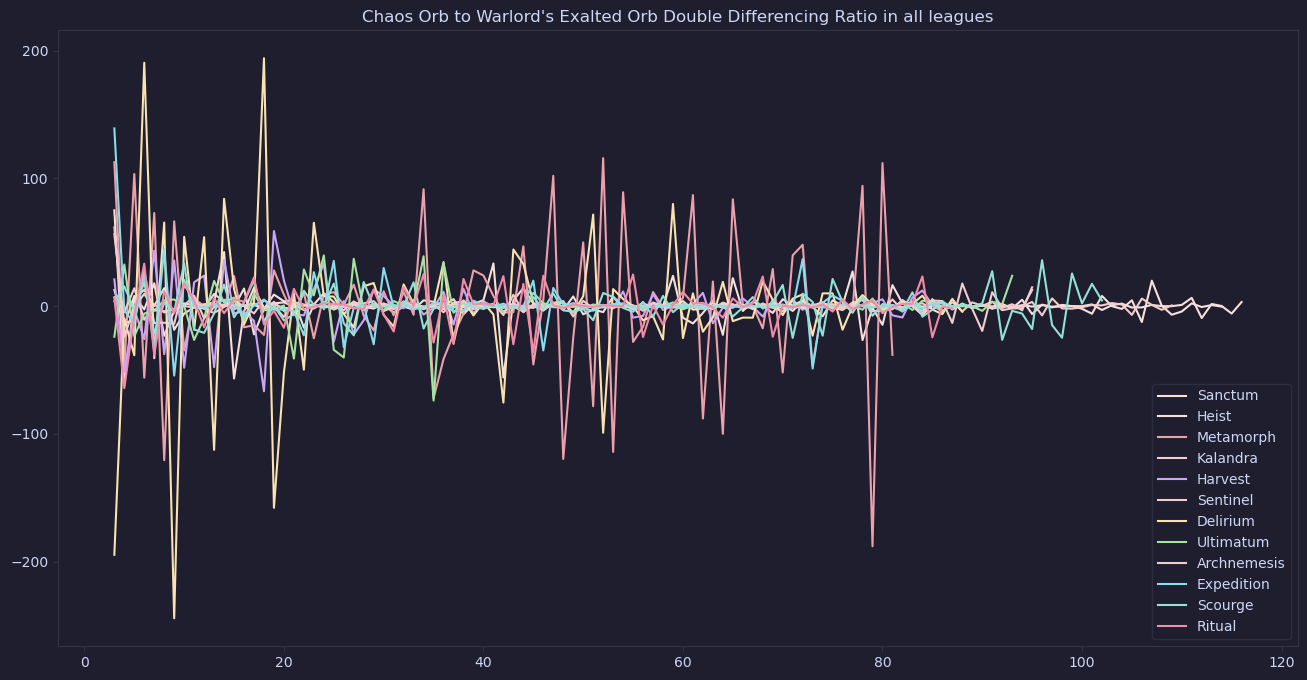

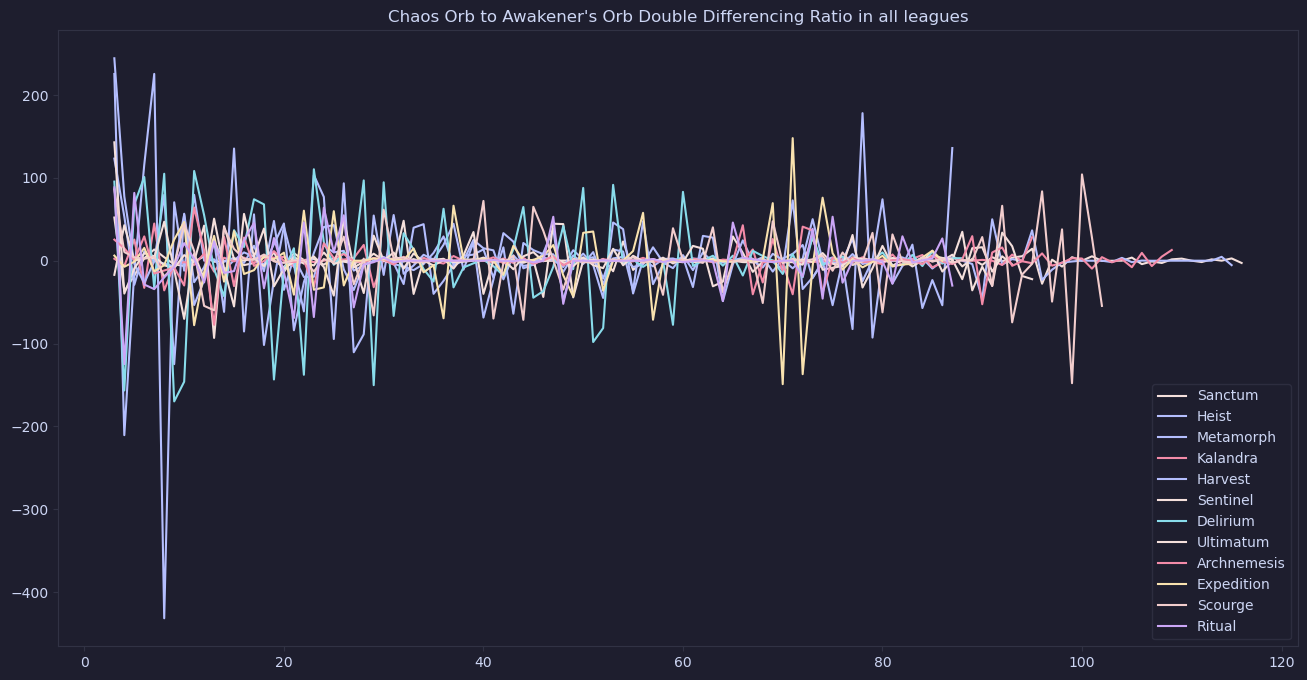

In [39]:
for currency in currencies:
    league_start_graph_diff2(currency)

In [16]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [56]:
for currency in currencies:
    path = '../leagues/'
    average_p = 0
    count = 0
    for league in os.listdir(path):
        df = league_df(league, currency)
        if df.empty:
            continue
        df = trade_ratio(df)
        df = average_ratio(df)
        adftest = interpret_dftest(adfuller(df['Ratio']))
        print(adftest)
        average_p += adftest[1]
        count += 1
    print(f'{average_p/count} is the average P value for {currency}')
    print('='*40)

Test Statistic   -9.699851e+00
p-value           1.079497e-16
dtype: float64
Test Statistic   -1.348307
p-value           0.606793
dtype: float64
Test Statistic   -2.306097
p-value           0.170009
dtype: float64
Test Statistic   -1.876077
p-value           0.343398
dtype: float64
Test Statistic   -0.914264
p-value           0.783239
dtype: float64
Test Statistic   -1.334480
p-value           0.613254
dtype: float64
Test Statistic   -4.169879
p-value           0.000741
dtype: float64
Test Statistic   -3.375993
p-value           0.011805
dtype: float64
Test Statistic   -3.550041
p-value           0.006791
dtype: float64
Test Statistic   -5.307018
p-value           0.000005
dtype: float64
Test Statistic   -4.167570
p-value           0.000747
dtype: float64
Test Statistic   -1.439196
p-value           0.563347
dtype: float64
0.2583440784710172 is the average P value for Hunter's Exalted Orb
Test Statistic   -2.427729
p-value           0.134063
dtype: float64
Test Statistic   -2.555144
p

In [30]:
for currency in currencies:
    path = '../leagues/'
    average_p = 0
    count = 0
    for league in os.listdir(path):
        df = league_df(league, currency)
        if df.empty:
            continue
        df = trade_ratio(df)
        df = average_ratio(df)
        adftest = interpret_dftest(adfuller(df['Ratio'].diff().dropna()))
        average_p += adftest[1]
        count += 1
    print(f'{average_p/count} is the average P value for differenced {currency}')
    print('='*40)

0.03602292028058726 is the average P value for differenced Hunter's Exalted Orb
0.0018125351962361513 is the average P value for differenced Crusader's Exalted Orb
0.04991249496350598 is the average P value for differenced Redeemer's Exalted Orb
0.05519184237810288 is the average P value for differenced Warlord's Exalted Orb
0.03128219834962649 is the average P value for differenced Awakener's Orb


In [31]:
for currency in currencies:
    path = '../leagues/'
    average_p = 0
    count = 0
    for league in os.listdir(path):
        df = league_df(league, currency)
        if df.empty:
            continue
        df = trade_ratio(df)
        df = average_ratio(df)
        adftest = interpret_dftest(adfuller(df['Ratio'].diff().diff().dropna()))
        average_p += adftest[1]
        count += 1
    print(f'{average_p/count} is the average P value for double differenced {currency}')
    print('='*40)

0.0006455302451702083 is the average P value for double differenced Hunter's Exalted Orb
0.003267028010701736 is the average P value for double differenced Crusader's Exalted Orb
0.0005353521654683038 is the average P value for double differenced Redeemer's Exalted Orb
2.3799600047939137e-06 is the average P value for double differenced Warlord's Exalted Orb
3.132223328937575e-05 is the average P value for double differenced Awakener's Orb


## Standard

In [46]:
def standard_graph(currency):
    plt.figure(figsize=(16,8))
    
    df = league_df(currency=currency)
    df = trade_ratio(df)
    df = average_ratio(df)
    df = league_day(df)

    plt.plot(
        df['Day'],
        df['Ratio'],
    )
   
    plt.title(f'Chaos Orb to {currency} Ratio in standard')
    plt.savefig(f'../images/{currency}_standard.png')
    plt.show;

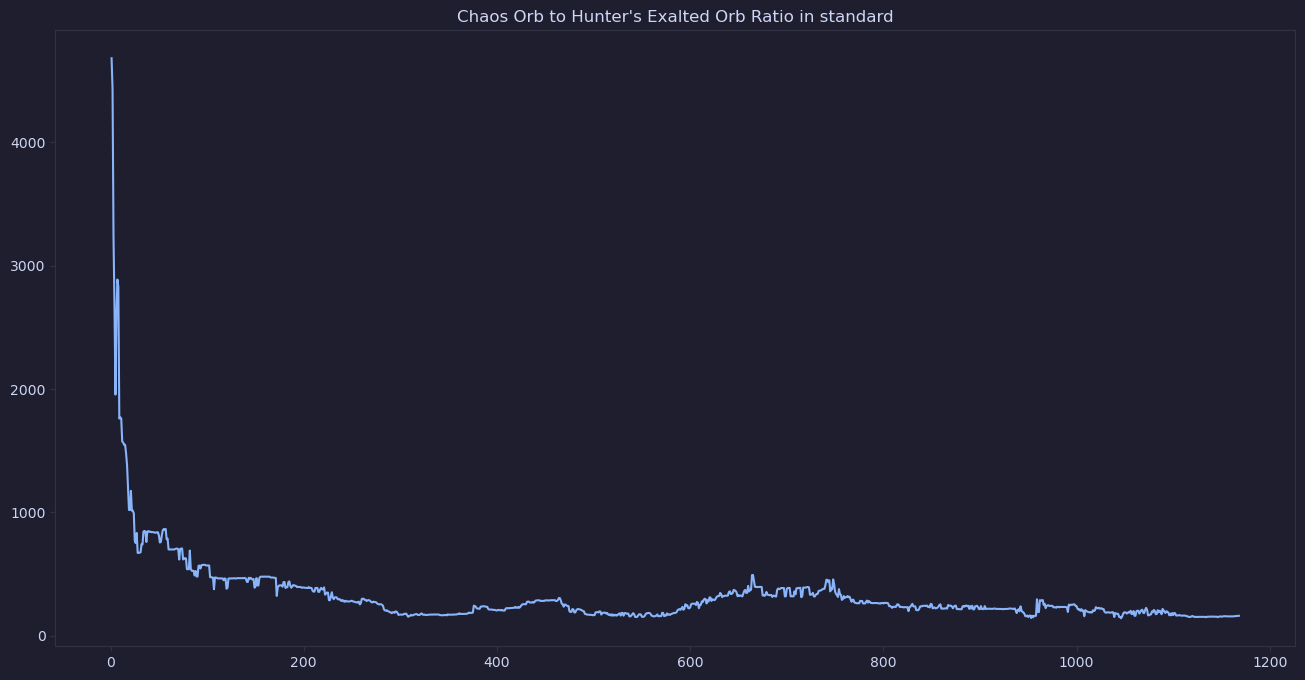

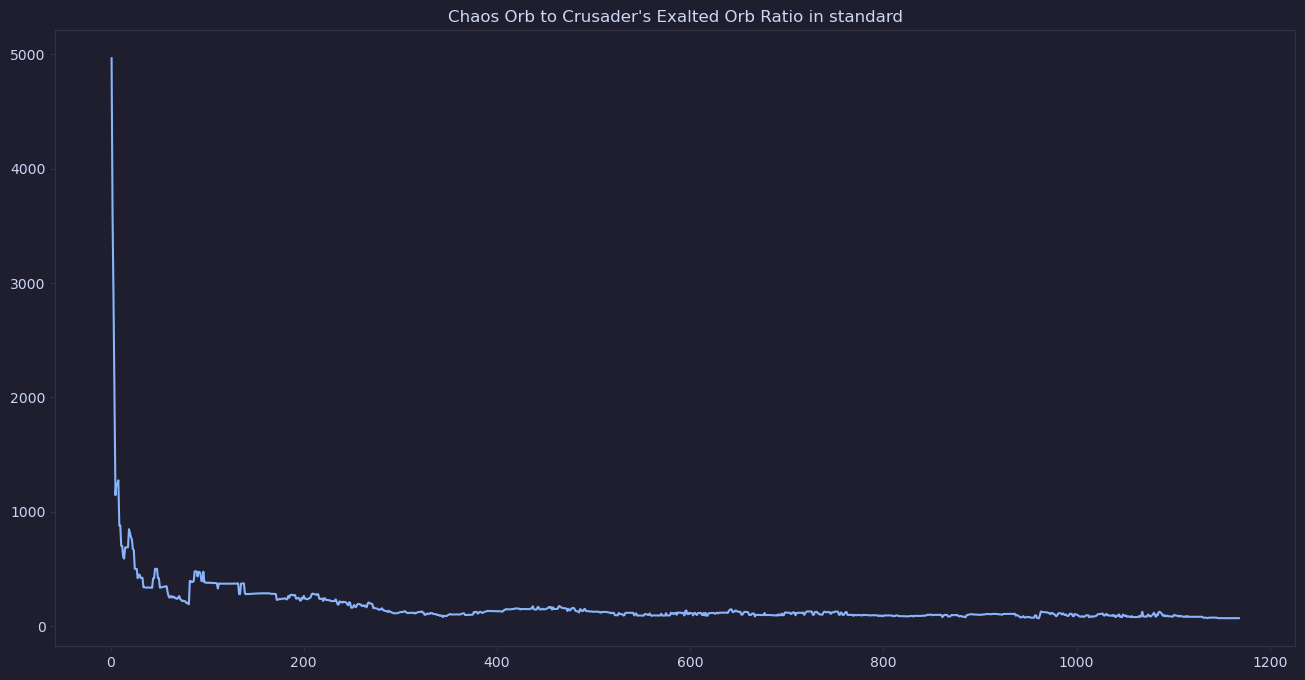

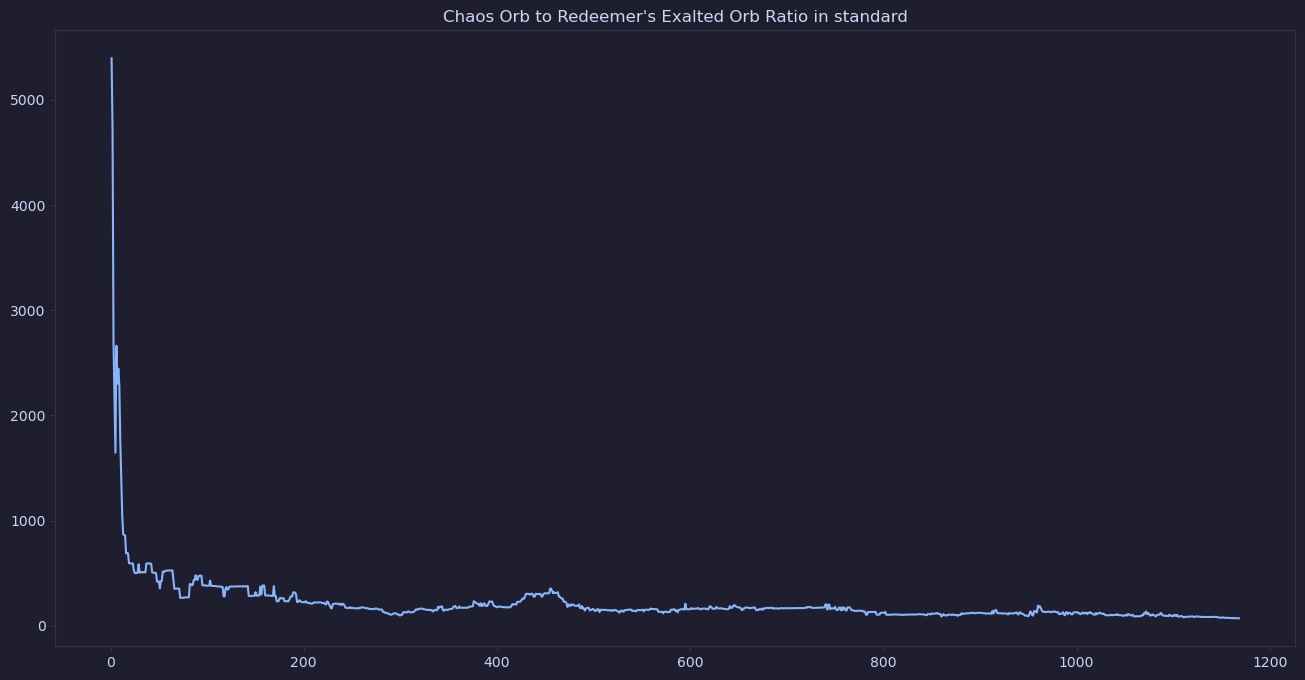

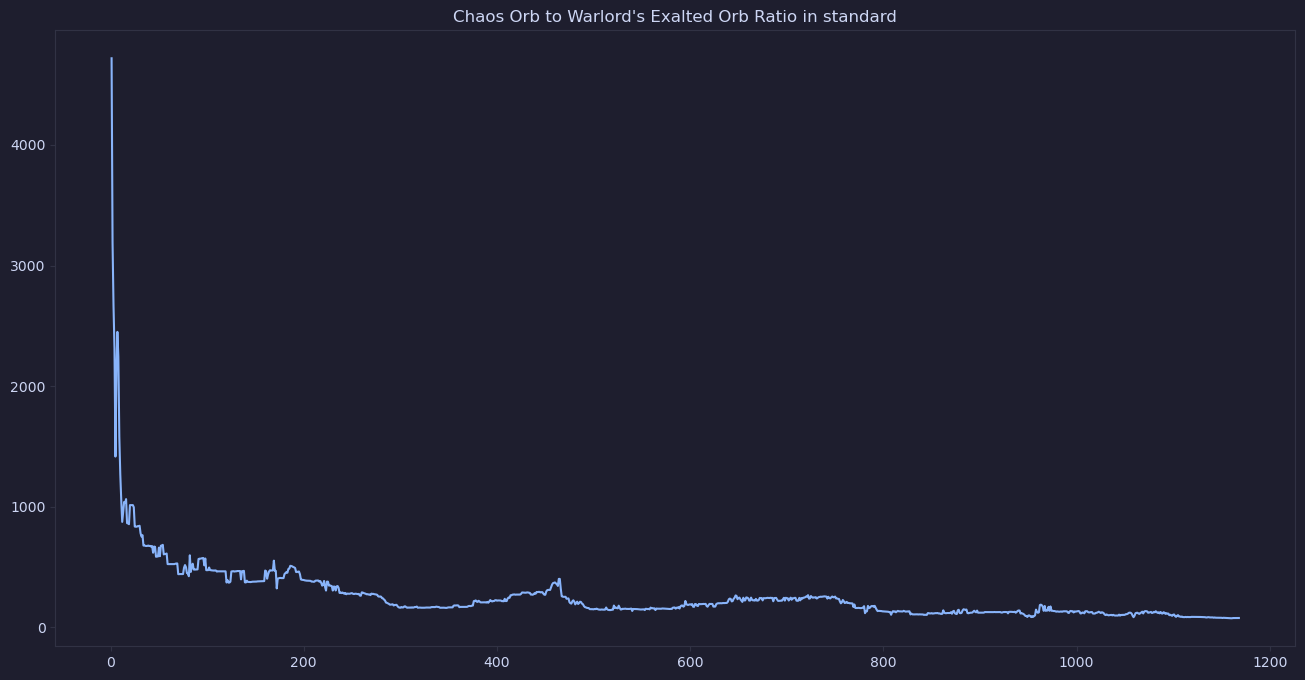

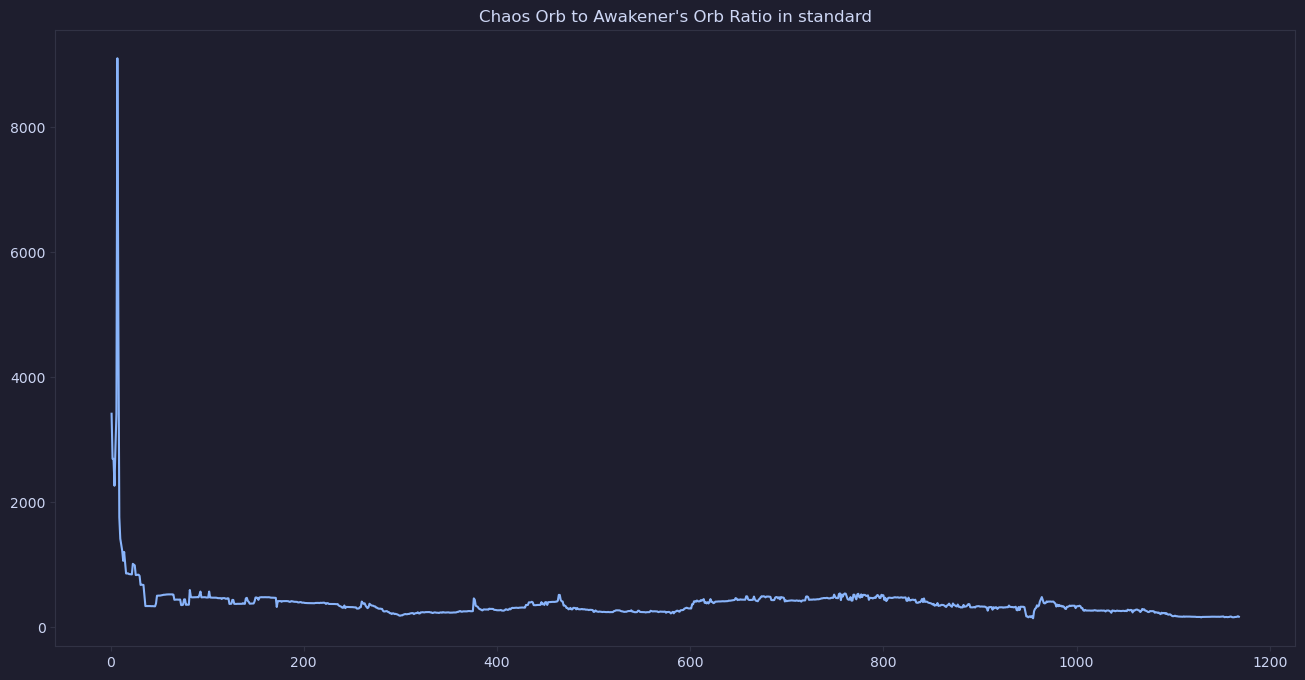

In [47]:
for currency in currencies:
    standard_graph(currency)

In [48]:
def standard_graph_moving(currency):
    plt.figure(figsize=(16,8))
    
    df = league_df(currency=currency)
    df = trade_ratio(df)
    df = average_ratio(df)
    df = league_day(df)

    plt.plot(
        df['Day'],
        df['Ratio'].rolling(window=4).mean(numeric_only=True),
    )
   
    plt.title(f'Chaos Orb to {currency} Ratio in standard')
    plt.savefig(f'../images/{currency}_standard.png')
    plt.show;

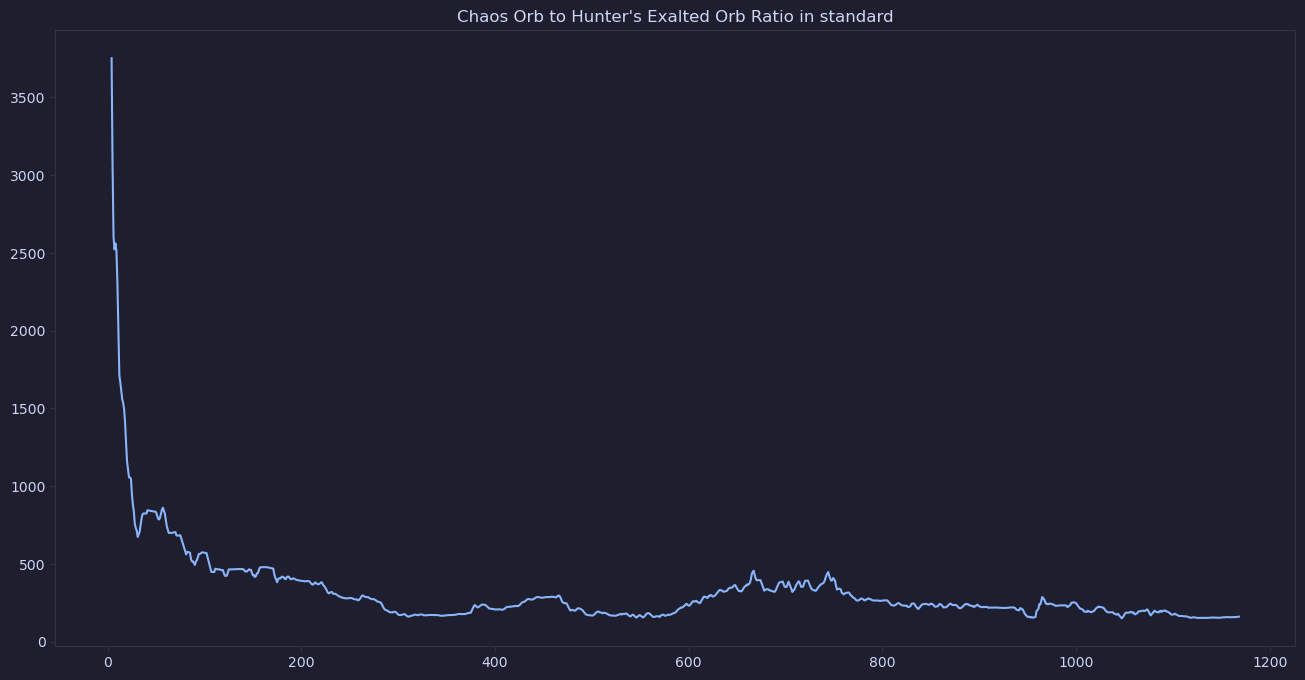

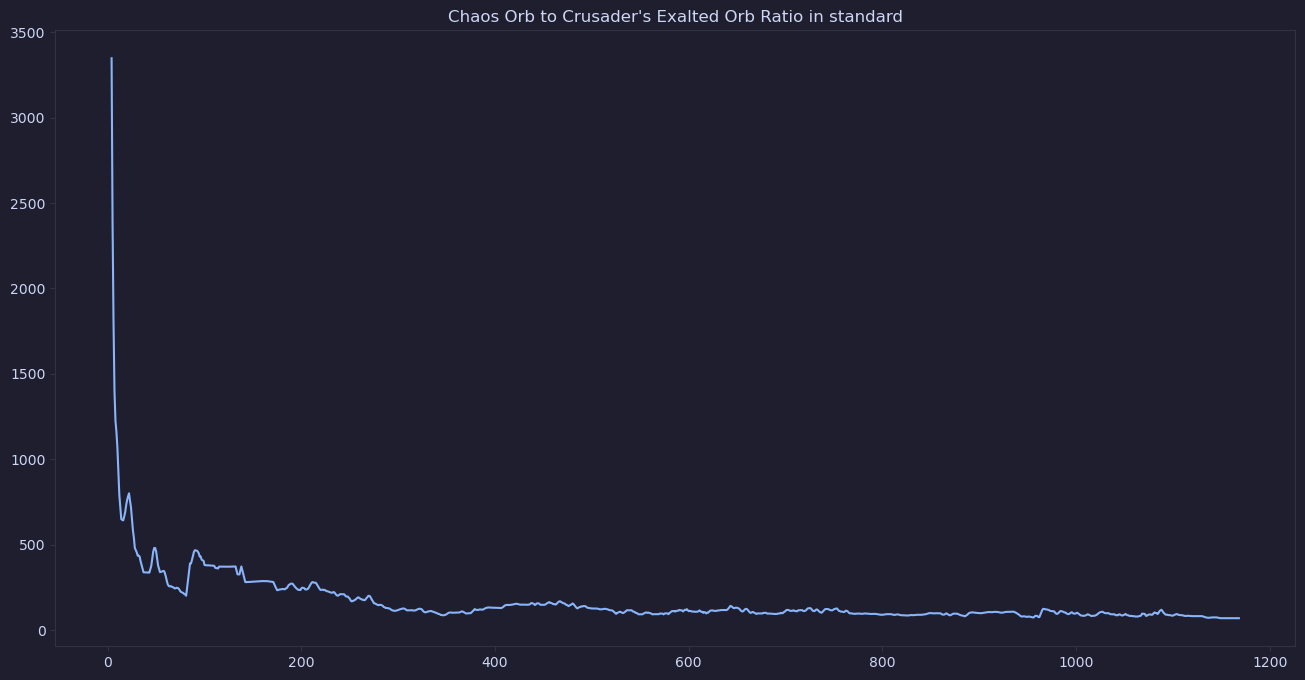

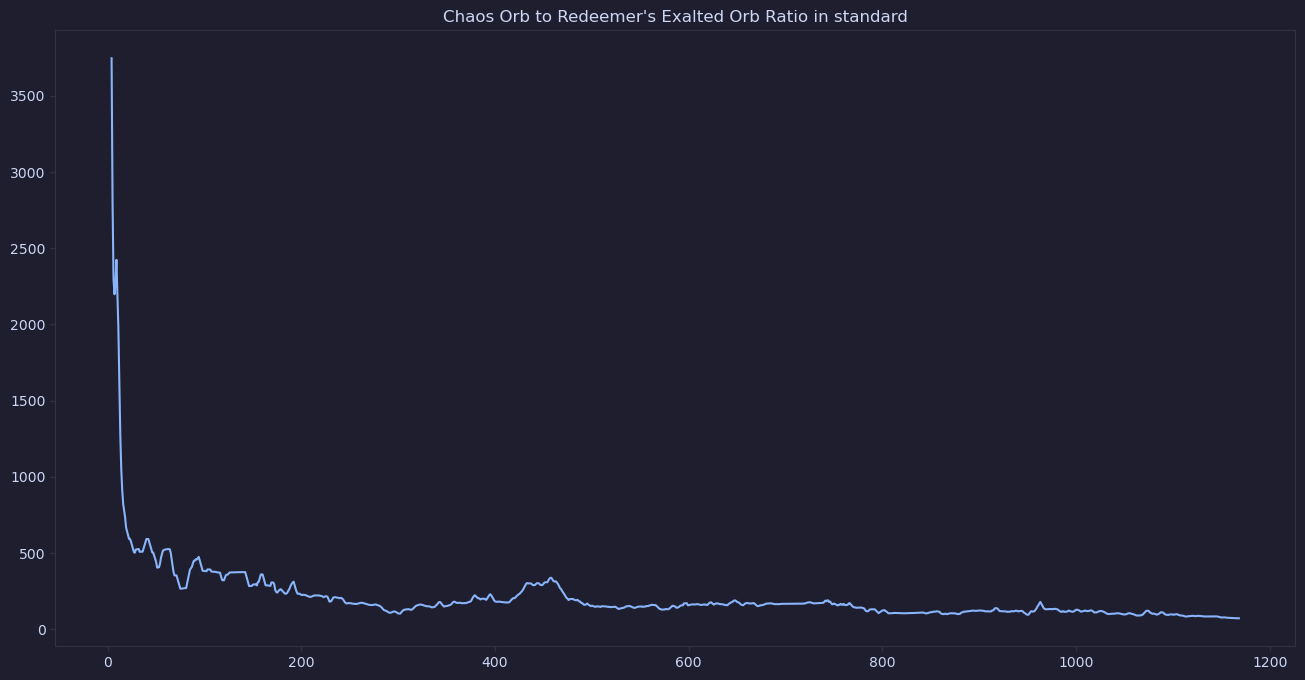

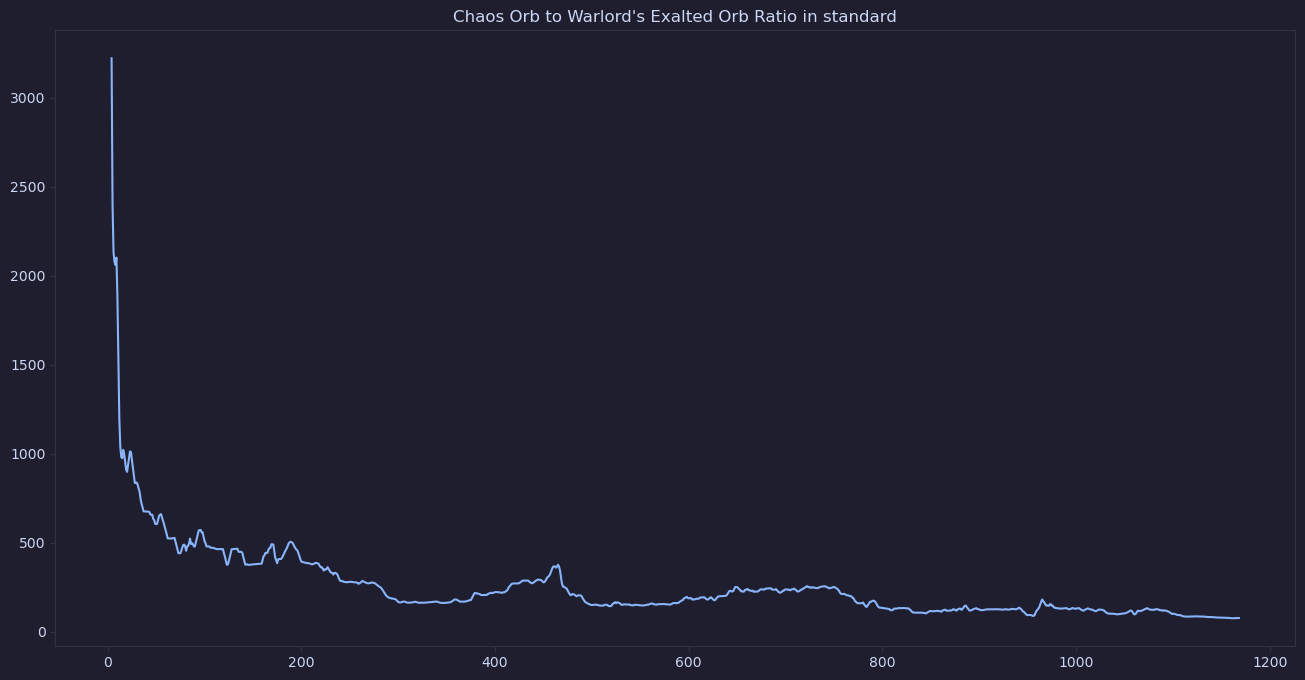

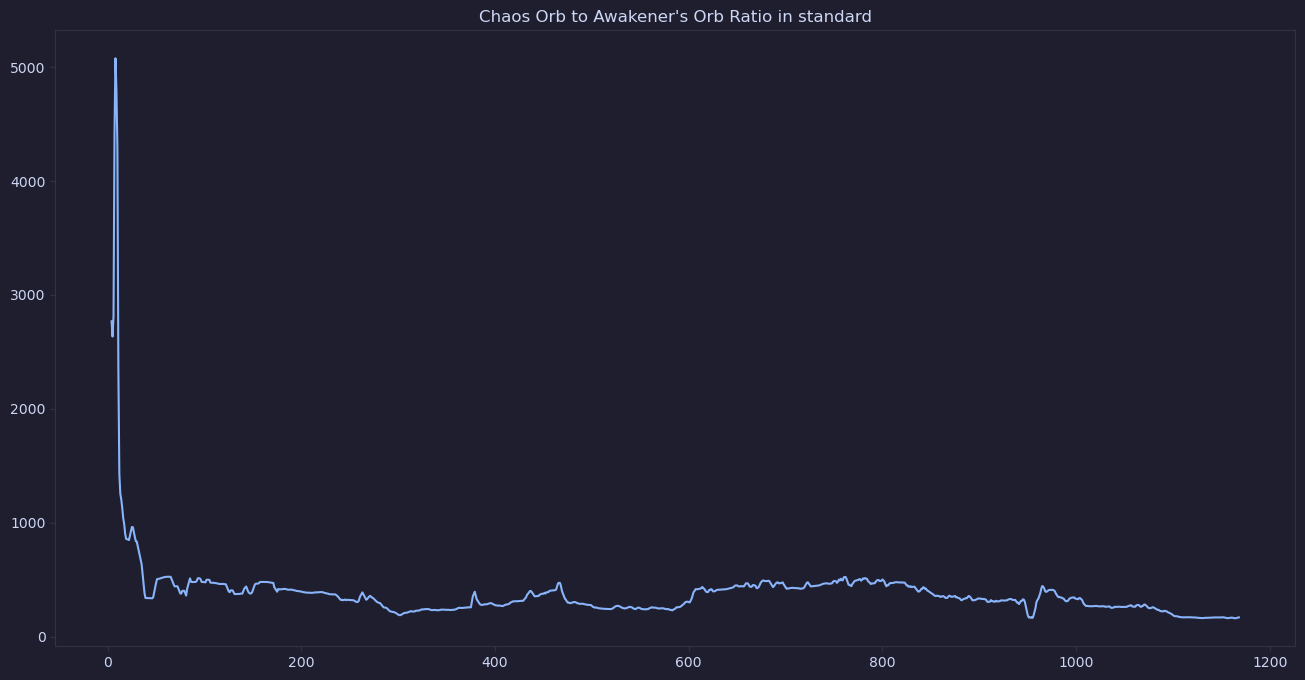

In [52]:
for currency in currencies:
    standard_graph_moving(currency)

In [50]:
def standard_graph_diff(currency):
    plt.figure(figsize=(16,8))
    
    df = league_df(currency=currency)
    df = trade_ratio(df)
    df = average_ratio(df)
    df = league_day(df)

    plt.plot(
        df['Day'],
        df['Ratio'].diff(),
    )
   
    plt.title(f'Chaos Orb to {currency} Ratio in standard')
    plt.savefig(f'../images/{currency}_standard.png')
    plt.show;

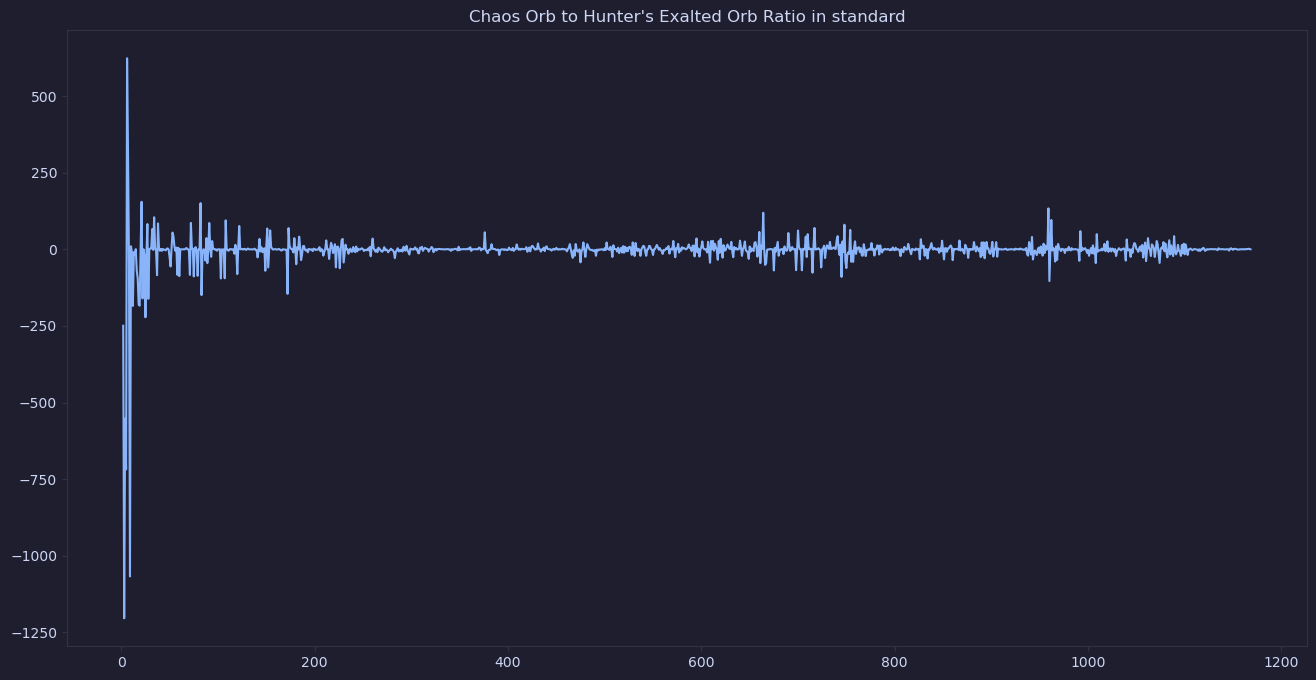

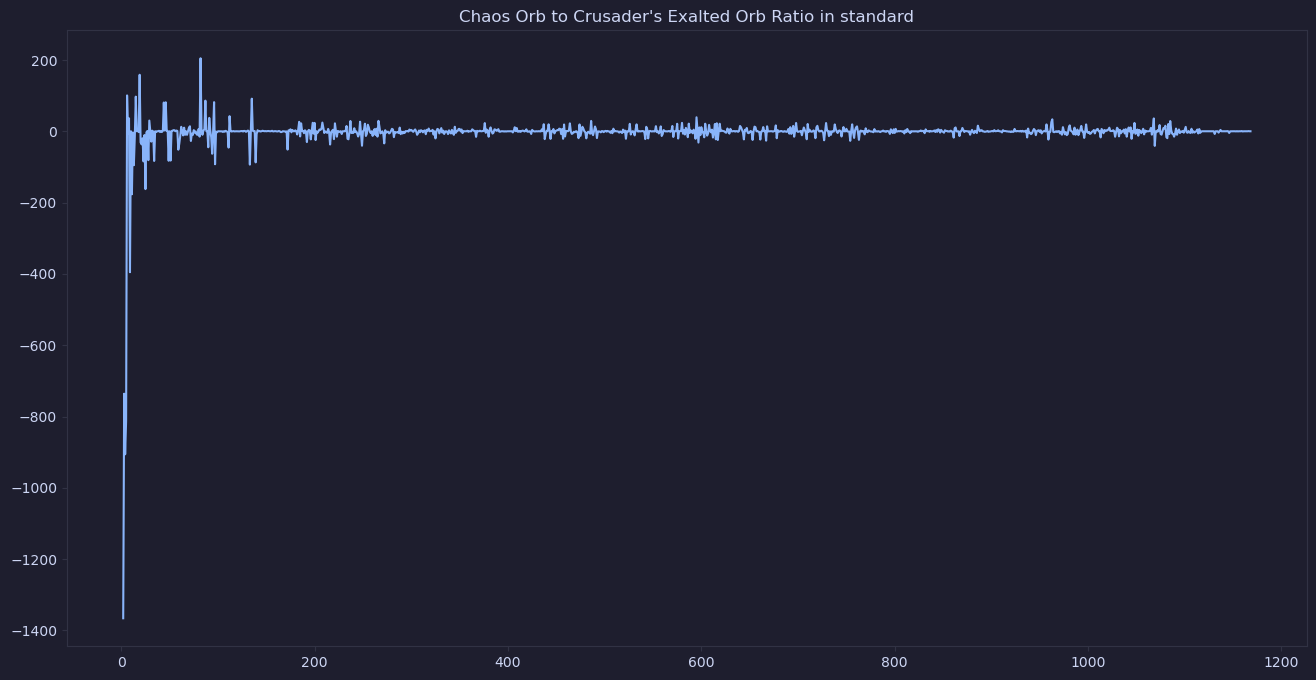

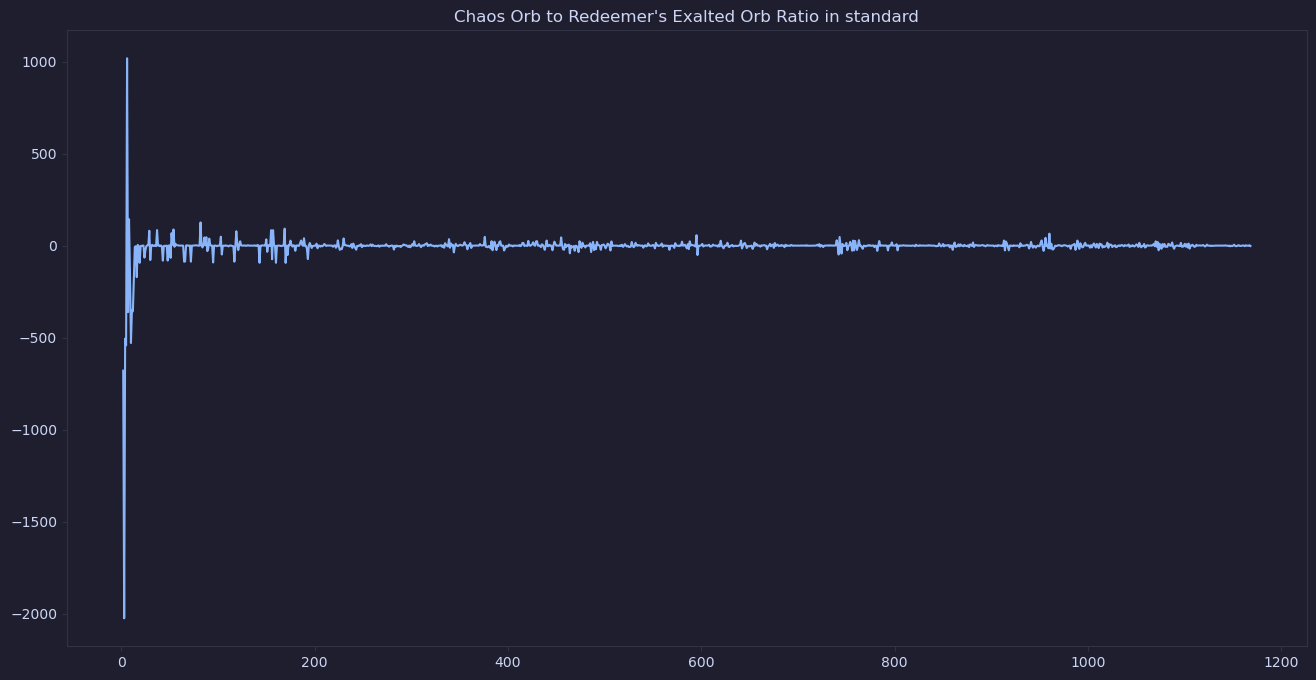

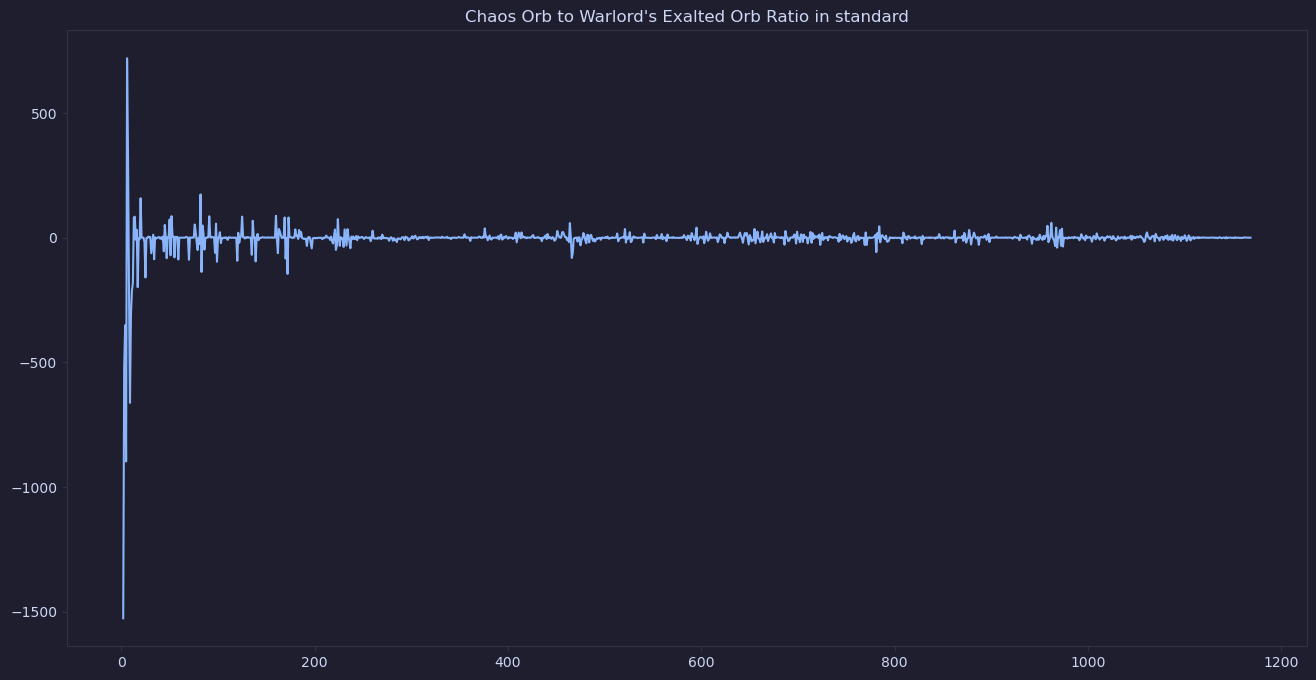

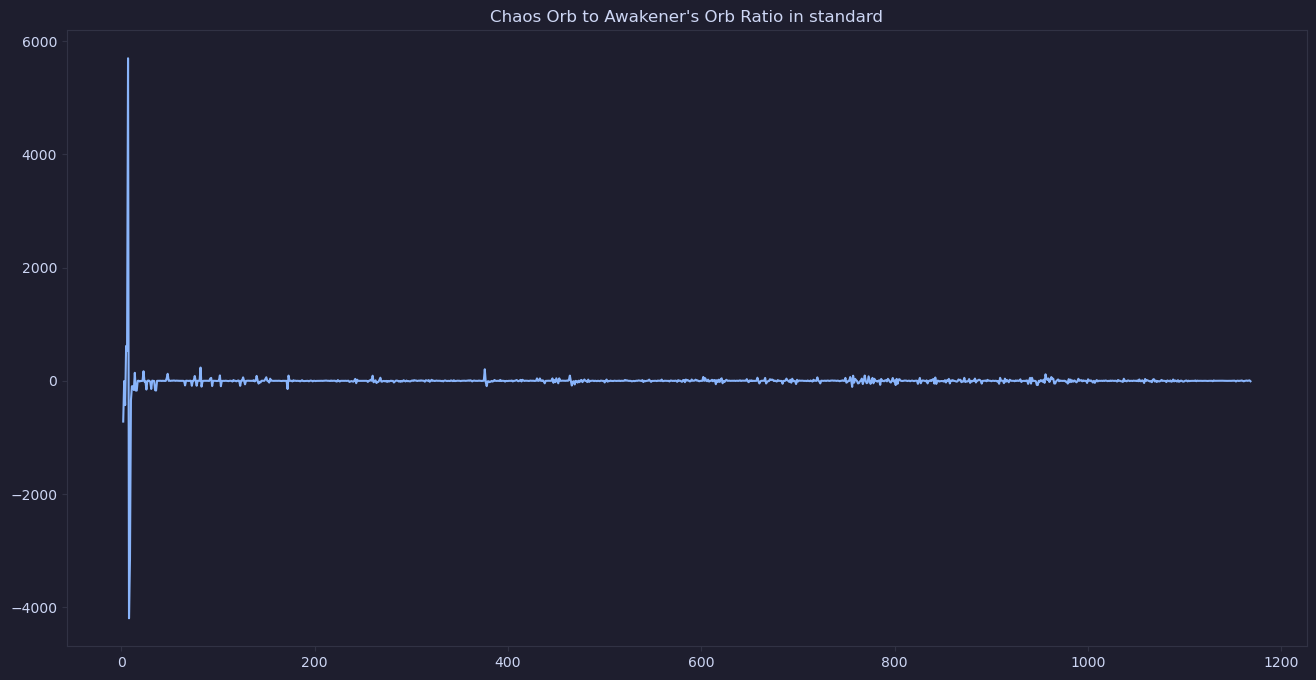

In [53]:
for currency in currencies:
    standard_graph_diff(currency)

In [54]:
def standard_graph_diff2(currency):
    plt.figure(figsize=(16,8))
    
    df = league_df(currency=currency)
    df = trade_ratio(df)
    df = average_ratio(df)
    df = league_day(df)

    plt.plot(
        df['Day'],
        df['Ratio'].diff(),
    )
   
    plt.title(f'Chaos Orb to {currency} Ratio in standard')
    plt.savefig(f'../images/{currency}_standard.png')
    plt.show;

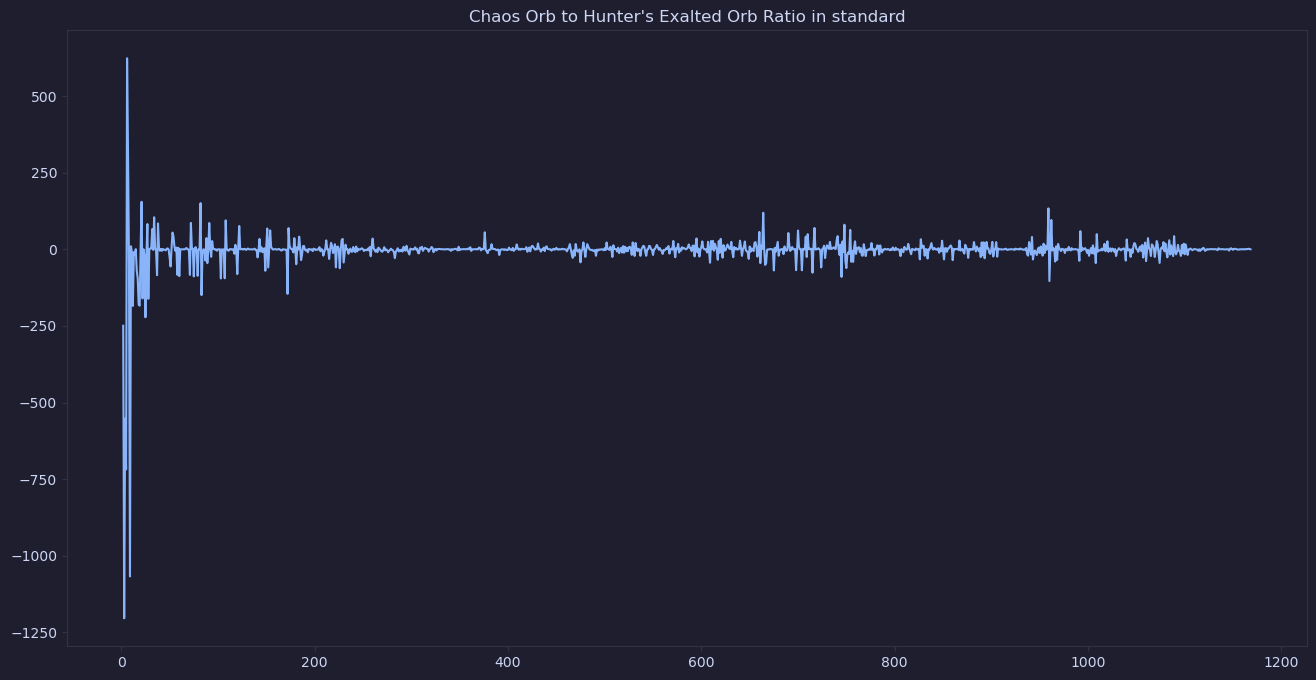

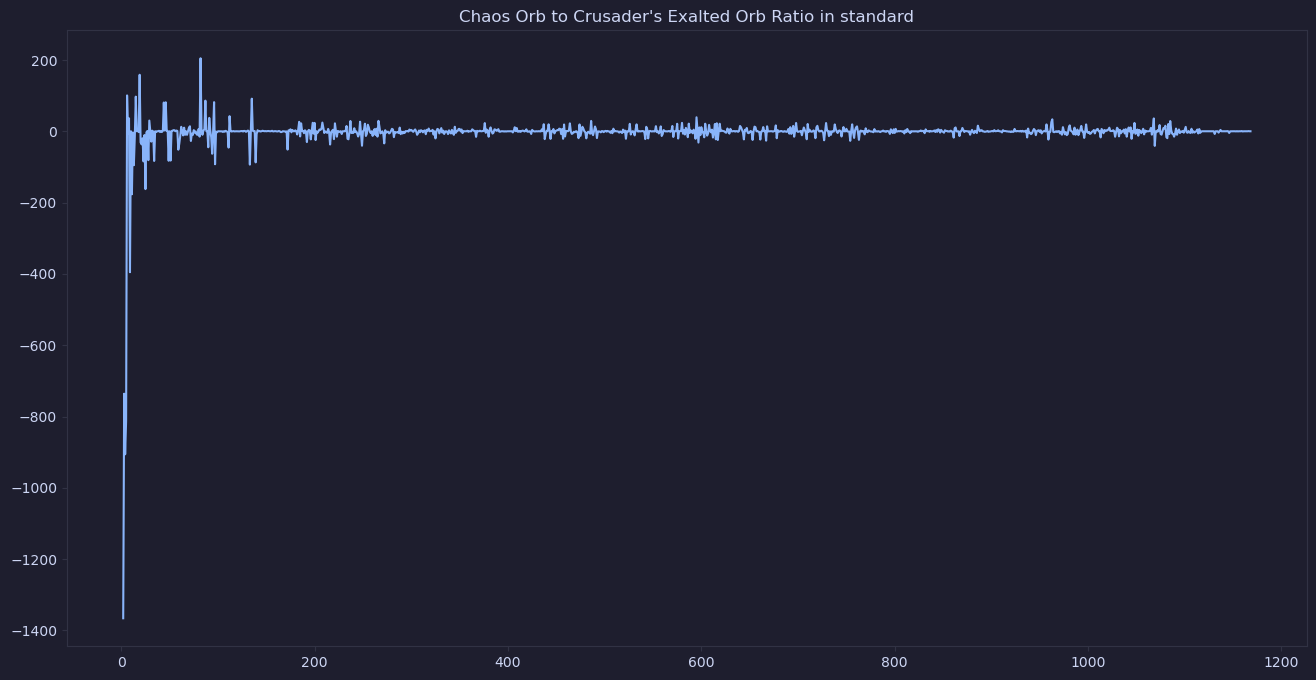

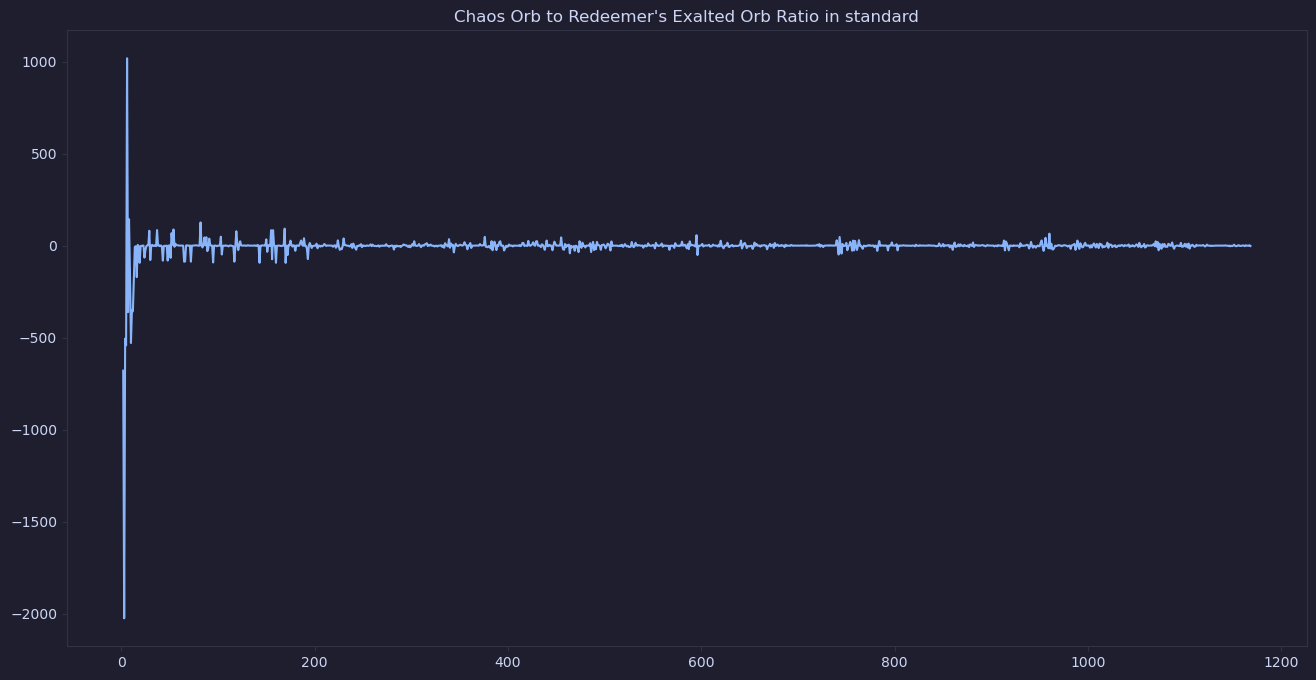

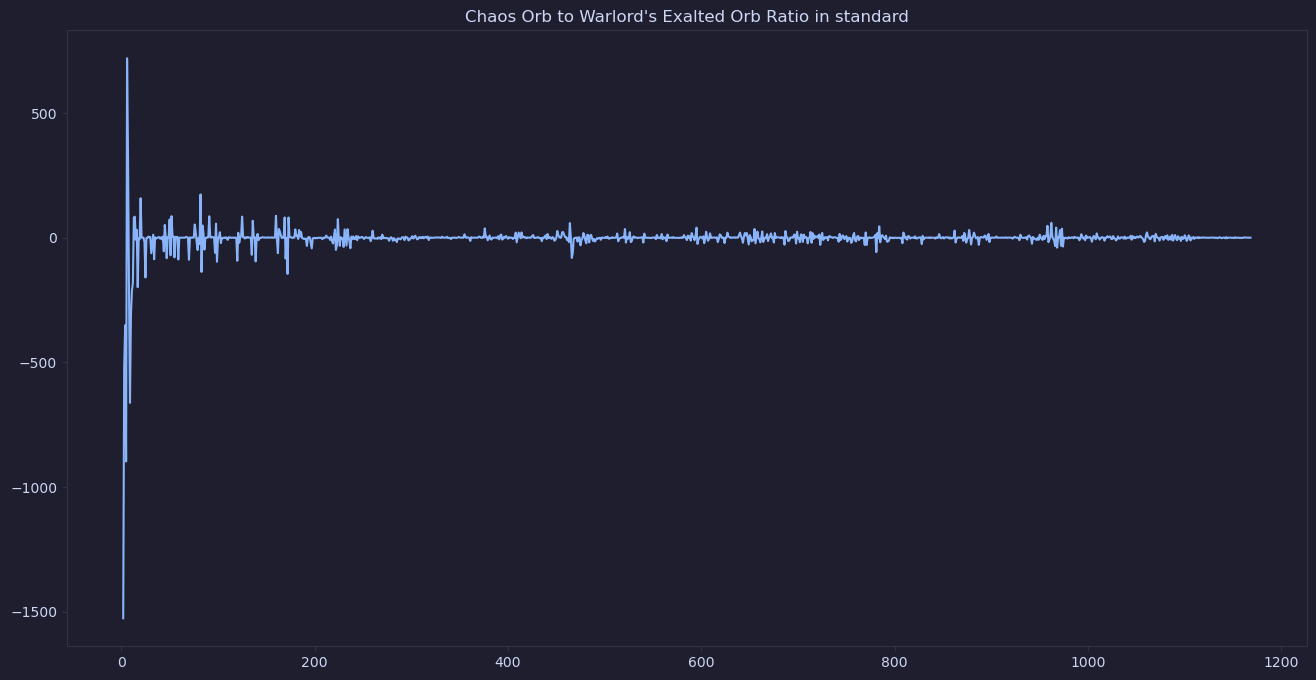

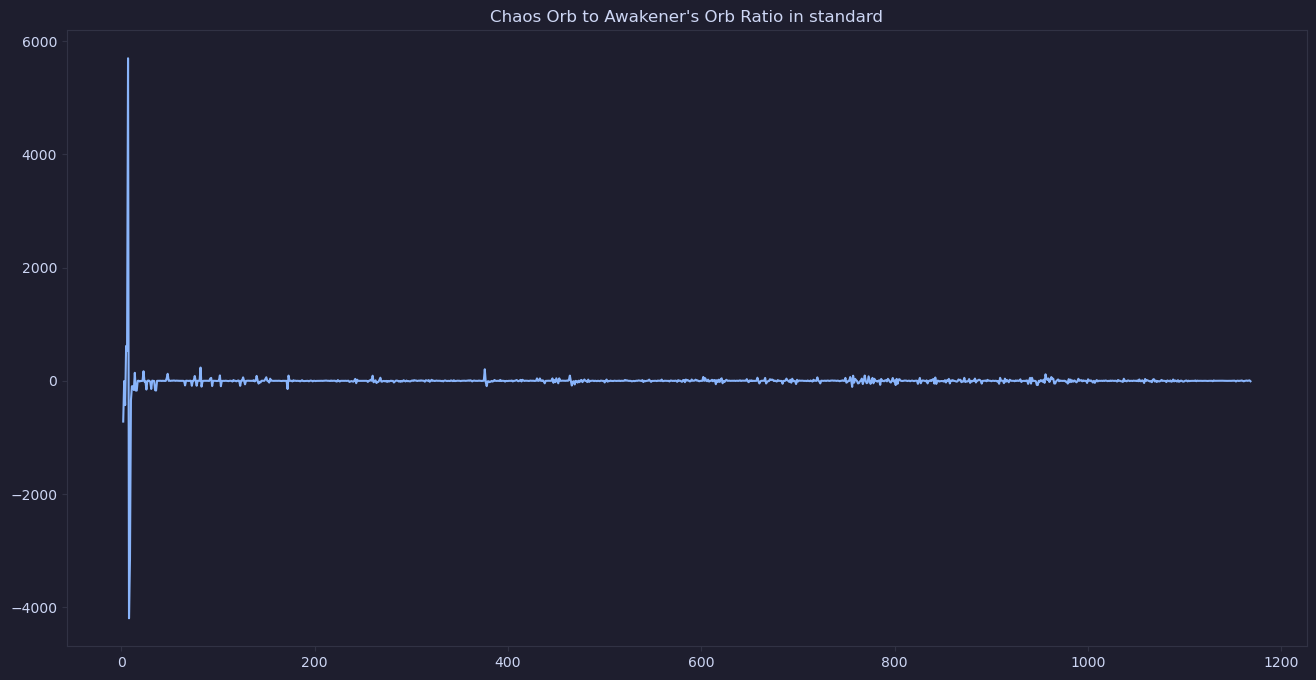

In [55]:
for currency in currencies:
    standard_graph_diff2(currency)